
**TASK**:
- You have been provided with a training data and a testing data. You need to fit the given data to polynomials of degree 1 to 9(both inclusive).
- Specifically, you have been given 20 subsets of training data containing 400 samples each. For each polynomial, create 20 models trained on the 20 different subsets and find the variance of the predictions on the testing data. Also, find the bias of your trained models on the testing data. Finally plot the bias-variance trade-Off graph.
- Write your observations in the report with respect to underfitting, overfitting and also comment on the type of data just by looking at the bias-variance plot.


# Import Useful Libraries files included

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import numpy as np
import random
import pickle
import pandas
import matplotlib.pyplot as plt

### STEP 1: LOADING THE DATASET AND VISUALISING IT

#### LOAD THE DATASET

#### Here we load the data_set from multiple files stored in the same directory as the current notebook.


In [2]:
# Get x train dataset
f = open('Q2_data/X_train.pkl', 'rb')
X_train_data_sets = pickle.load(f)
f.close()

# Get y train dataset
f = open('Q2_data/Y_train.pkl', 'rb')
Y_train_data_sets = pickle.load(f)
f.close()

# Get x test dataset
f = open('Q2_data/X_test.pkl', 'rb')
xTest = pickle.load(f)
f.close()

# Get y test dataset
f = open('Q2_data/Fx_test.pkl', 'rb')
yTest = pickle.load(f)
f.close()


### Checking the data sizes

In [9]:
print(X_train_data_sets.shape)
print(Y_train_data_sets.shape)
print(xTest.shape)
print(yTest.shape)

(20, 400)
(20, 400)
(80,)
(80,)


### Graphing each of the training datasets

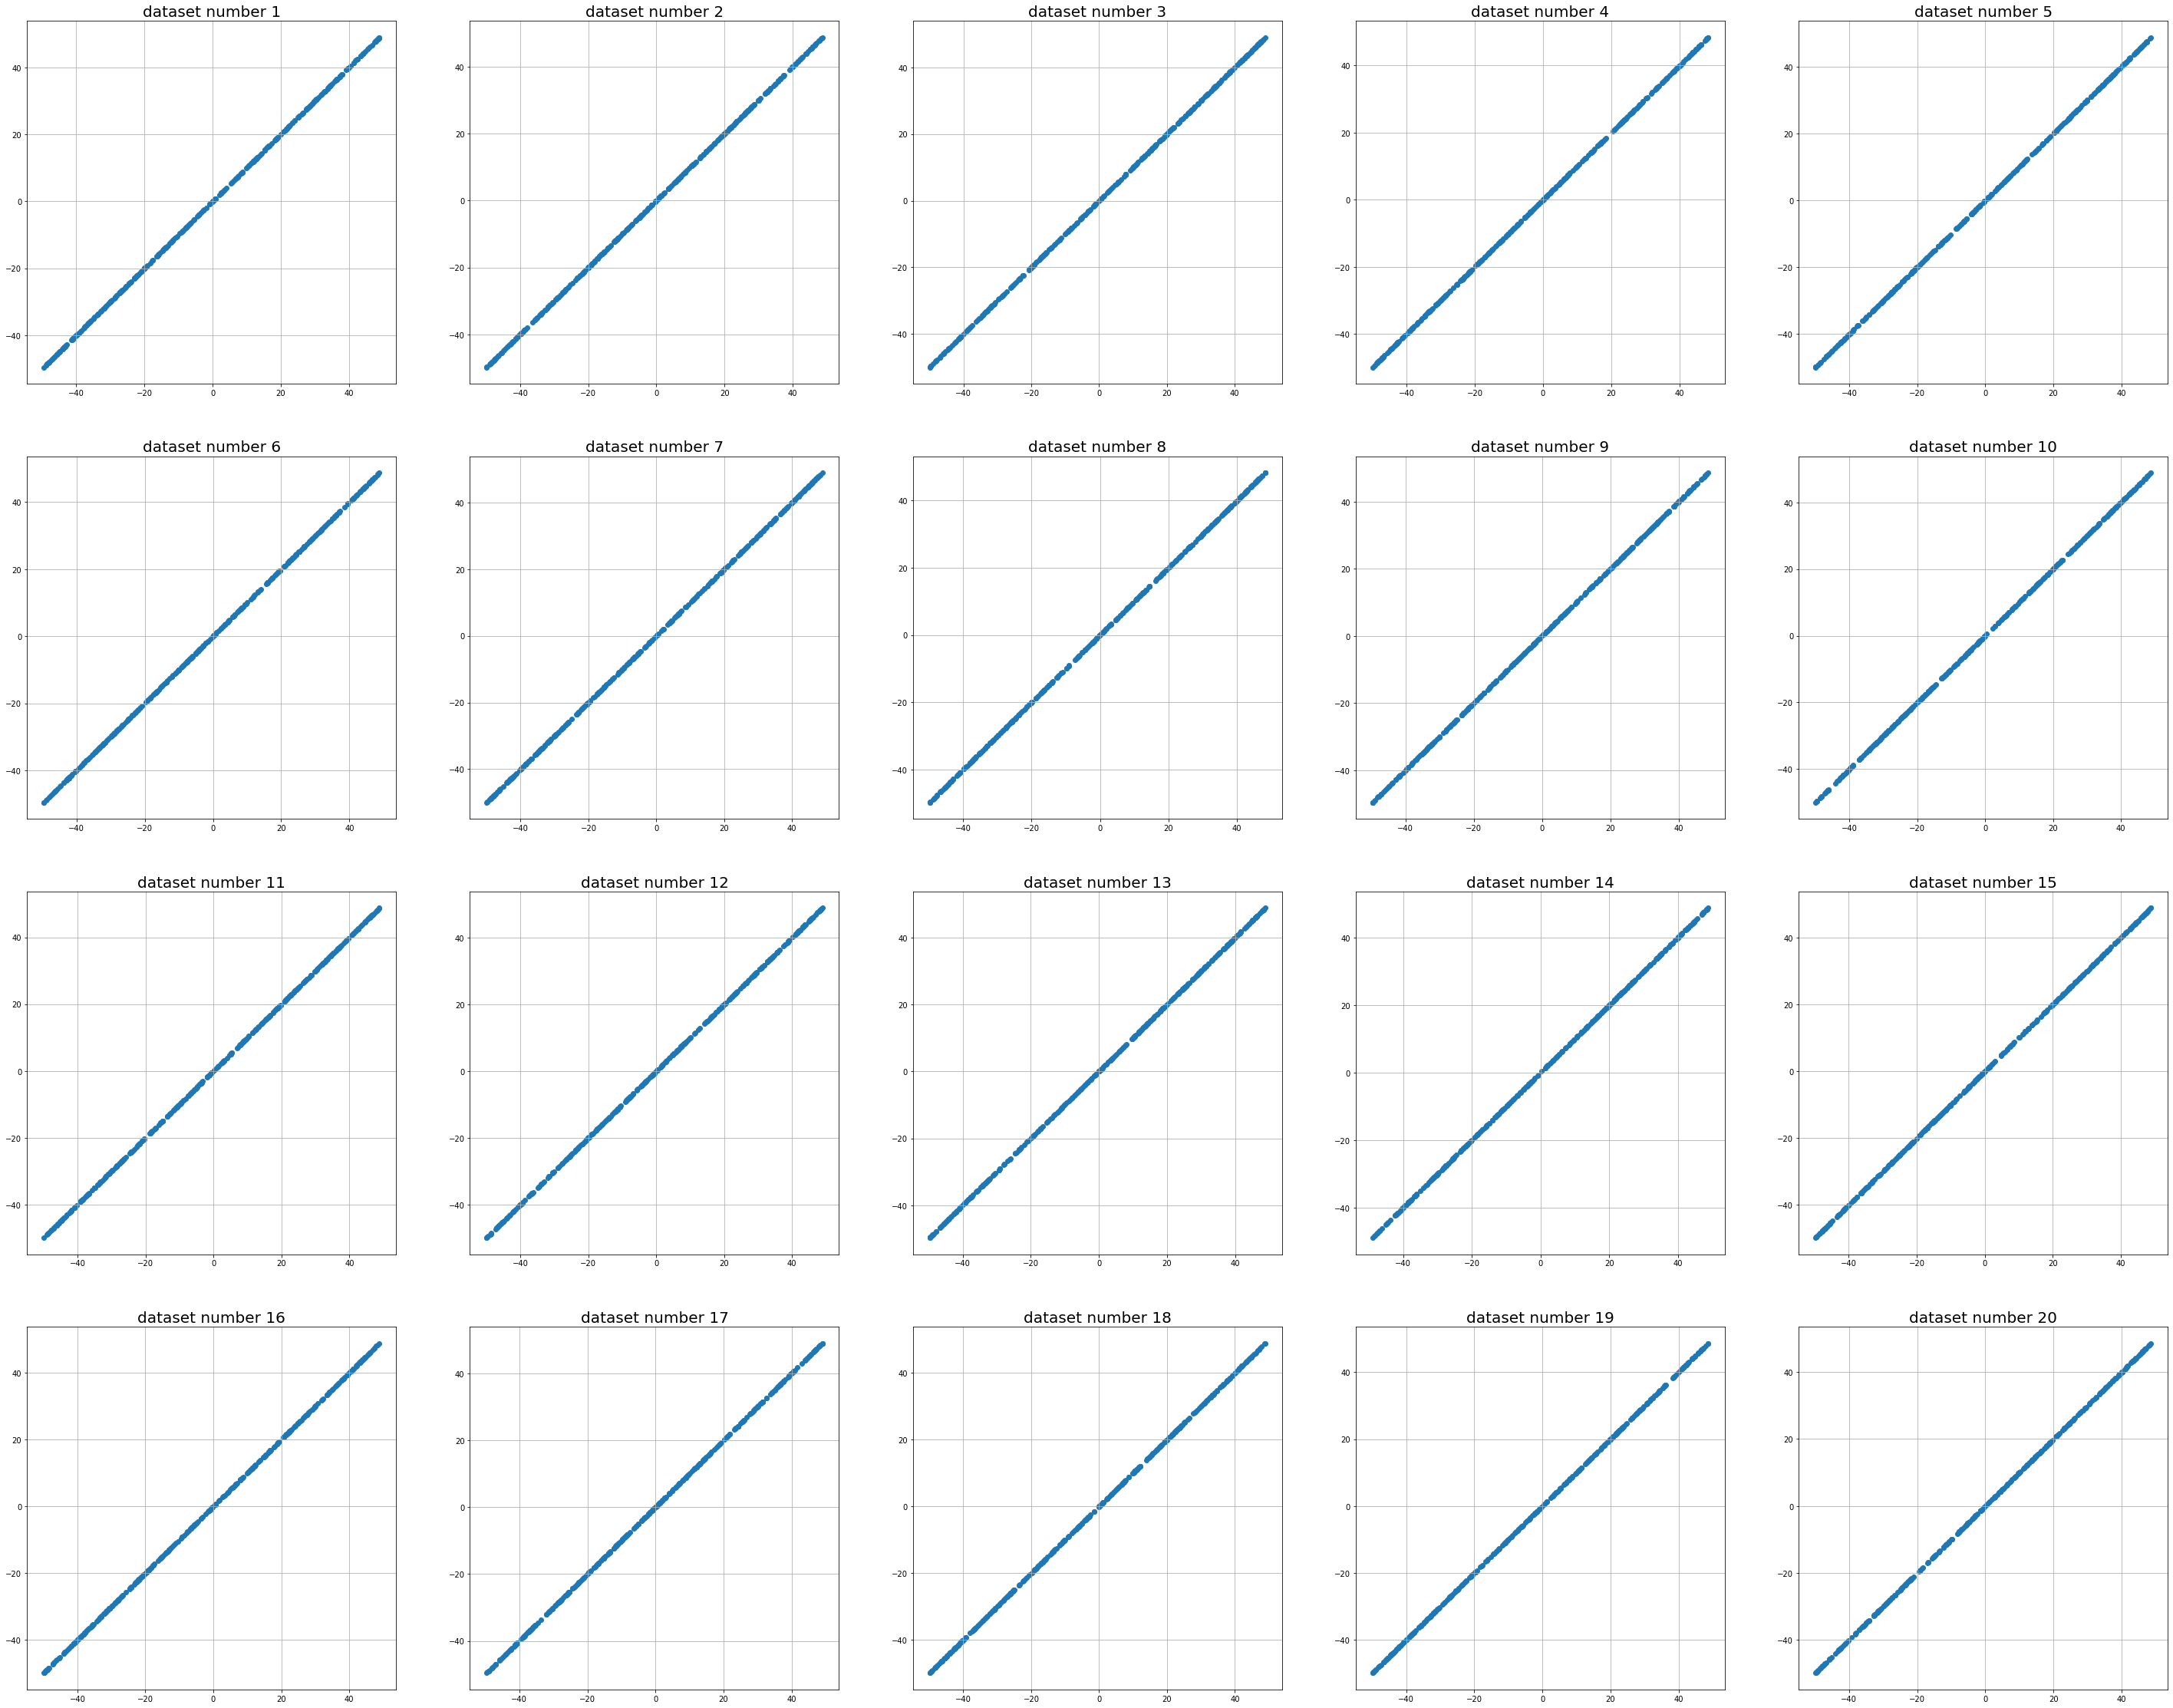

In [44]:
fig, axs = plt.subplots(4,5, figsize = (50,40))
for i in range(20):
    axs[int(i / 5)][int(i % 5)].scatter(X_train_data_sets[i], X_train_data_sets[i])
    axs[int(i / 5)][int(i % 5)].grid()
    axs[int(i / 5)][int(i % 5)].set_title(f"dataset number {i + 1}", fontdict = {"fontsize" : 20})

### Plotting a graph of the trained polynomial regression model

<Figure size 432x288 with 0 Axes>

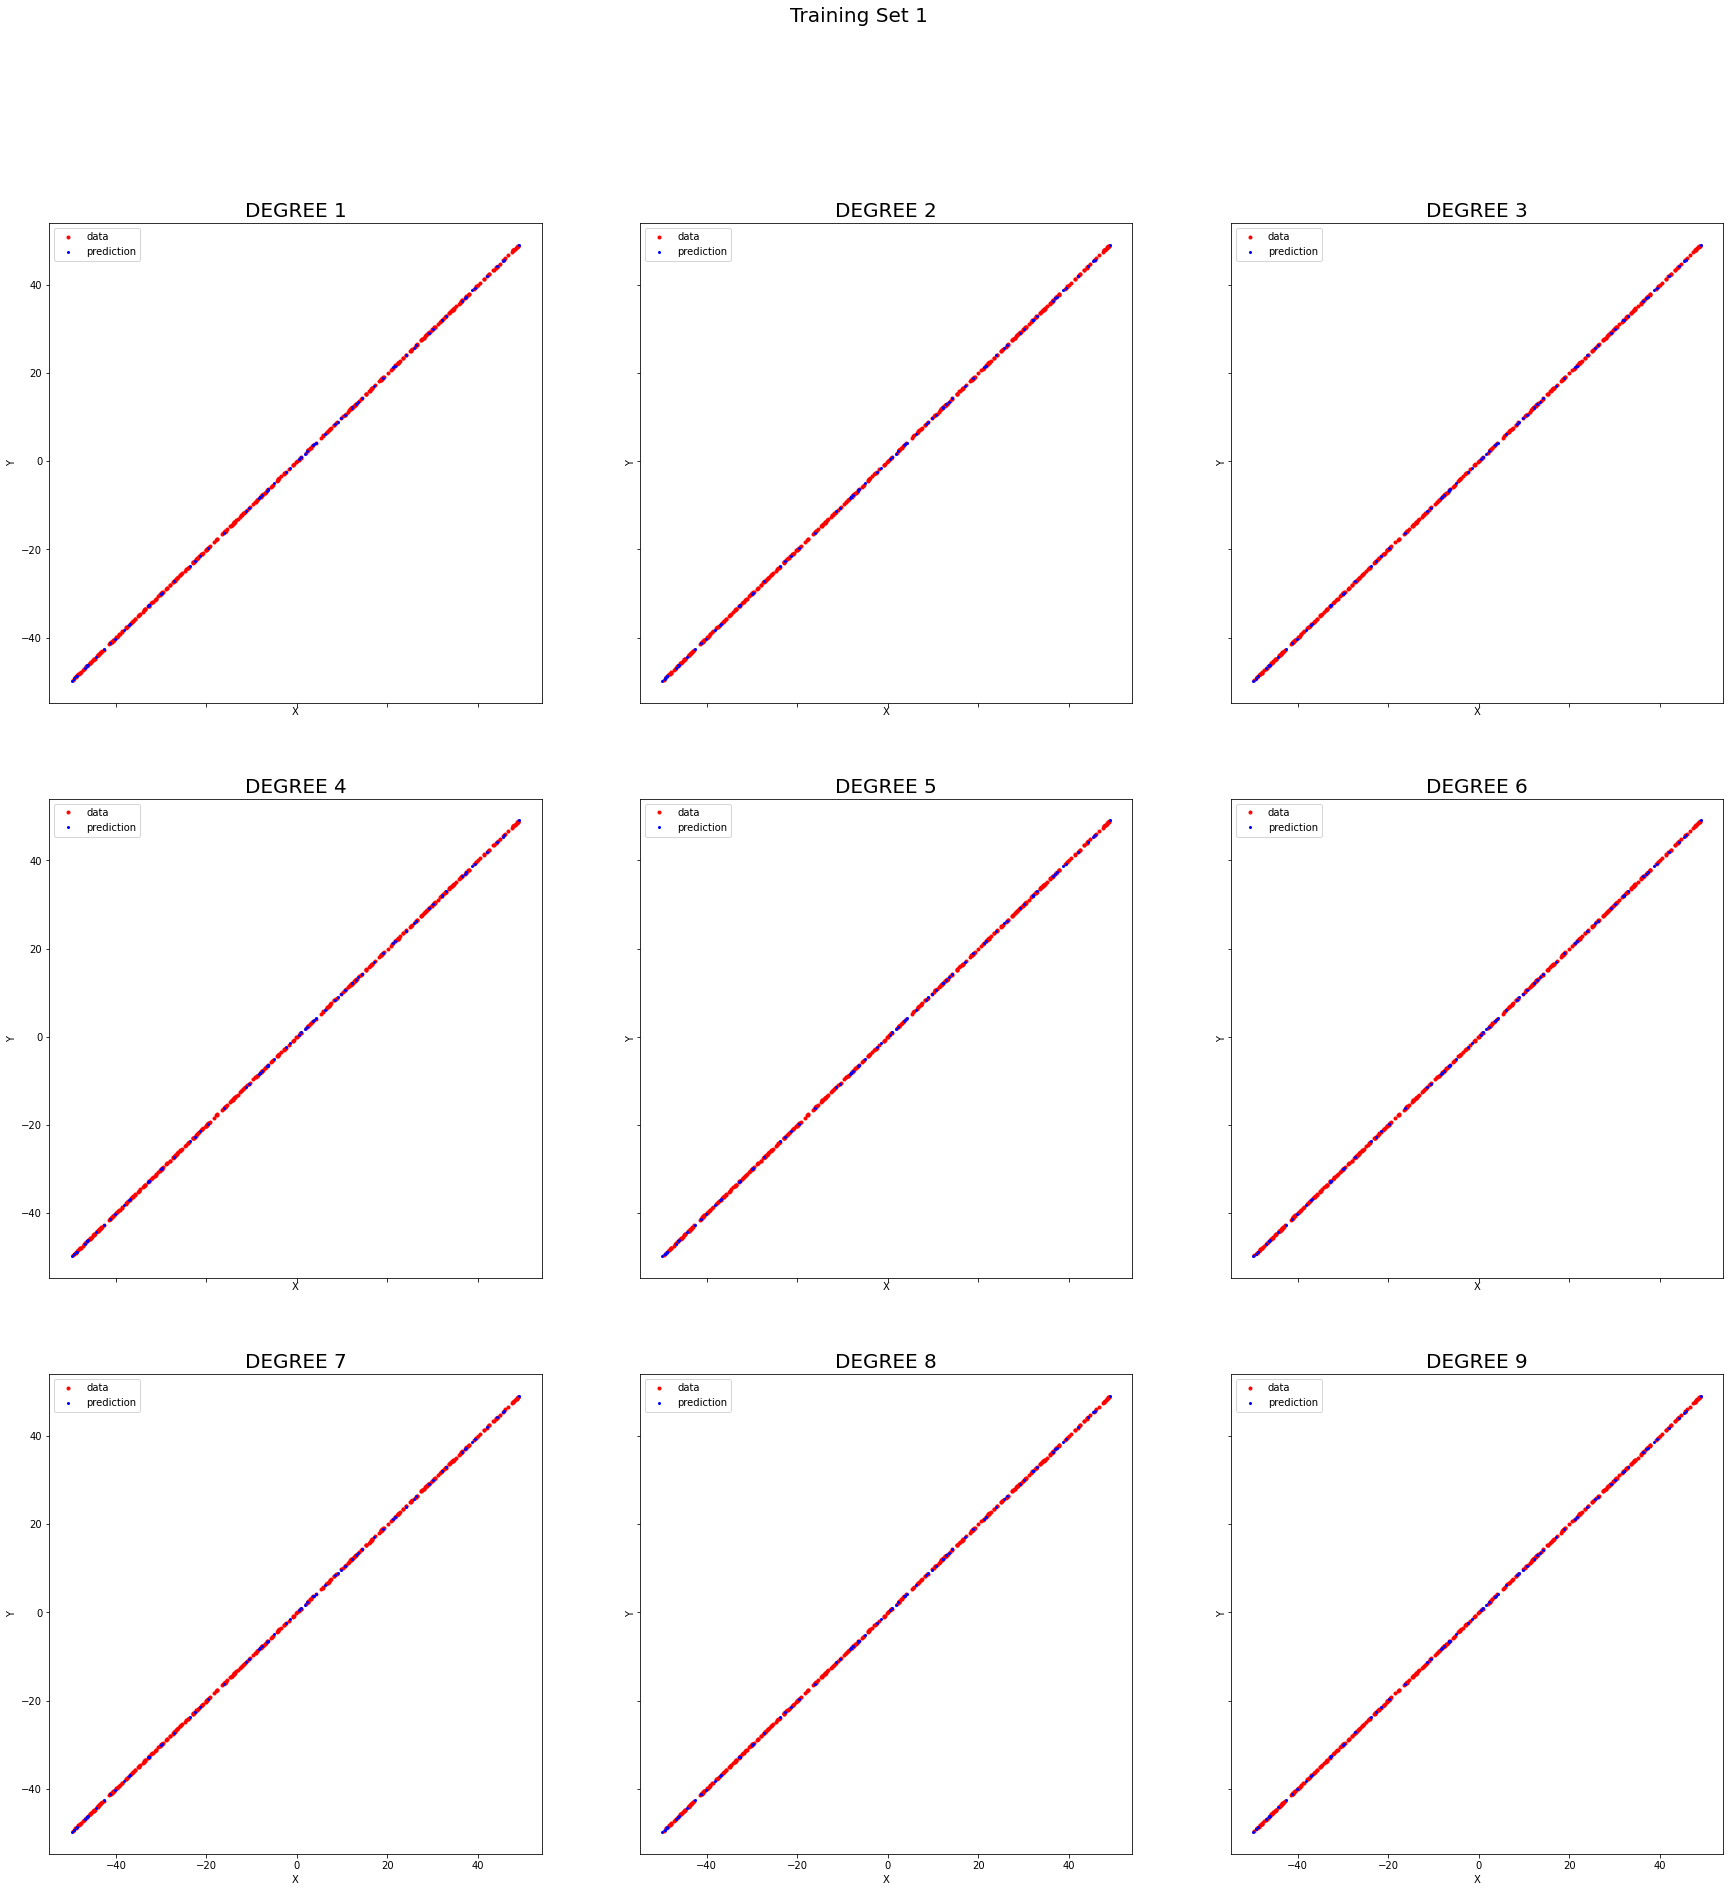

<Figure size 432x288 with 0 Axes>

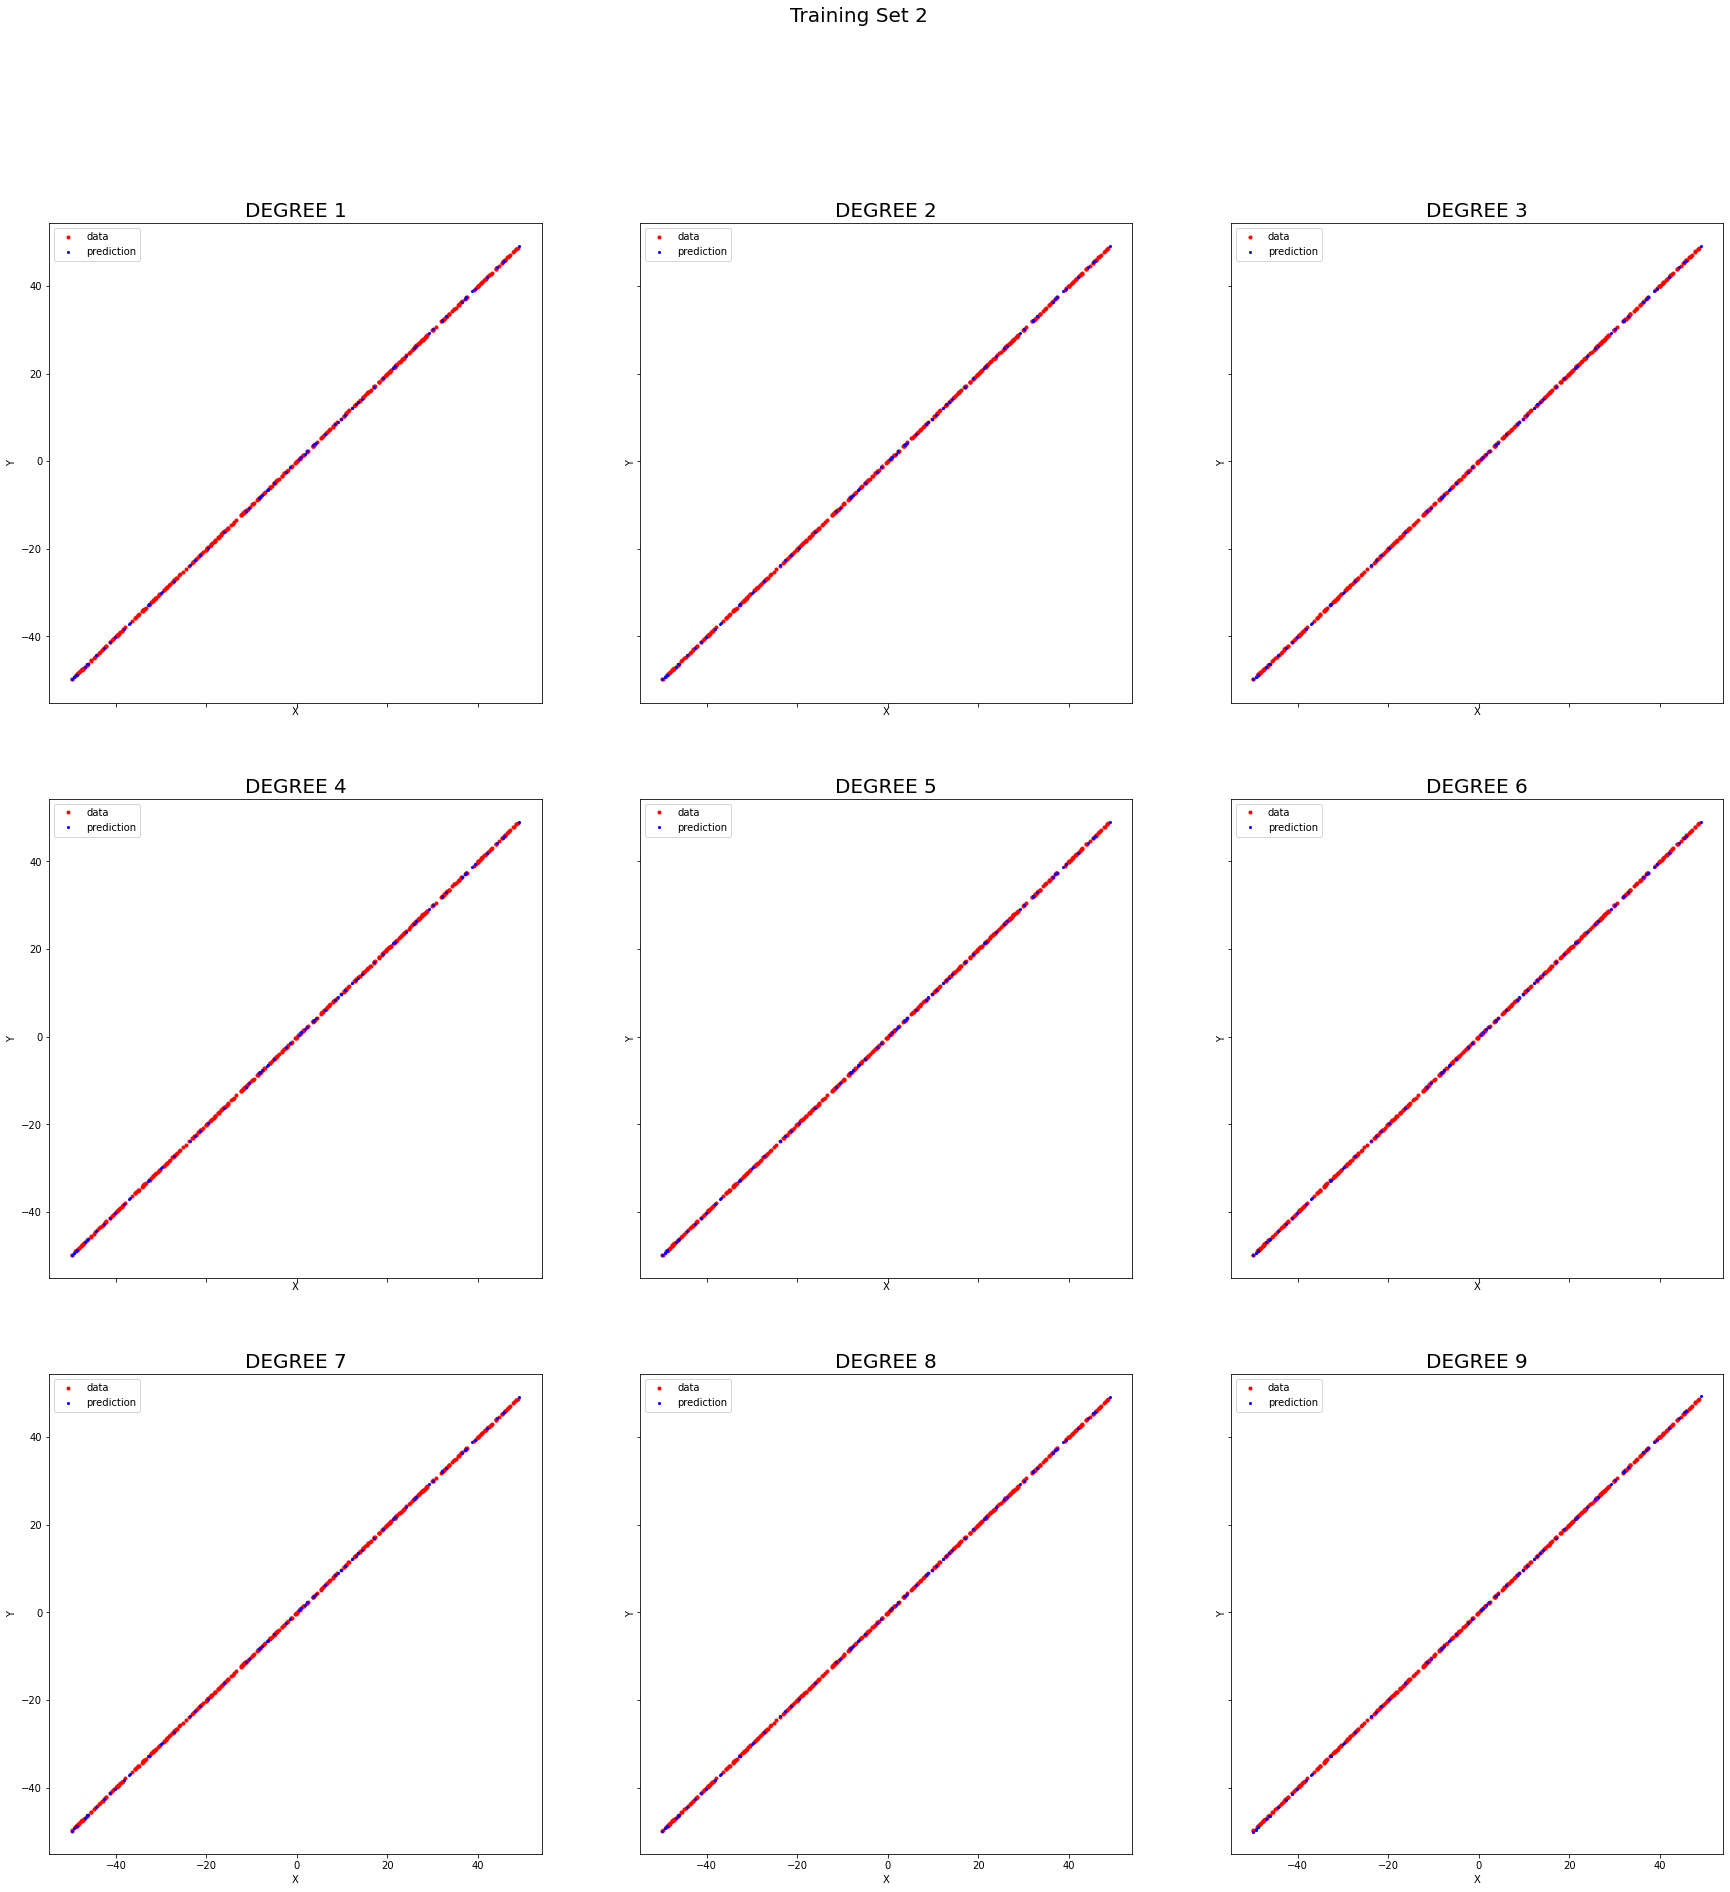

<Figure size 432x288 with 0 Axes>

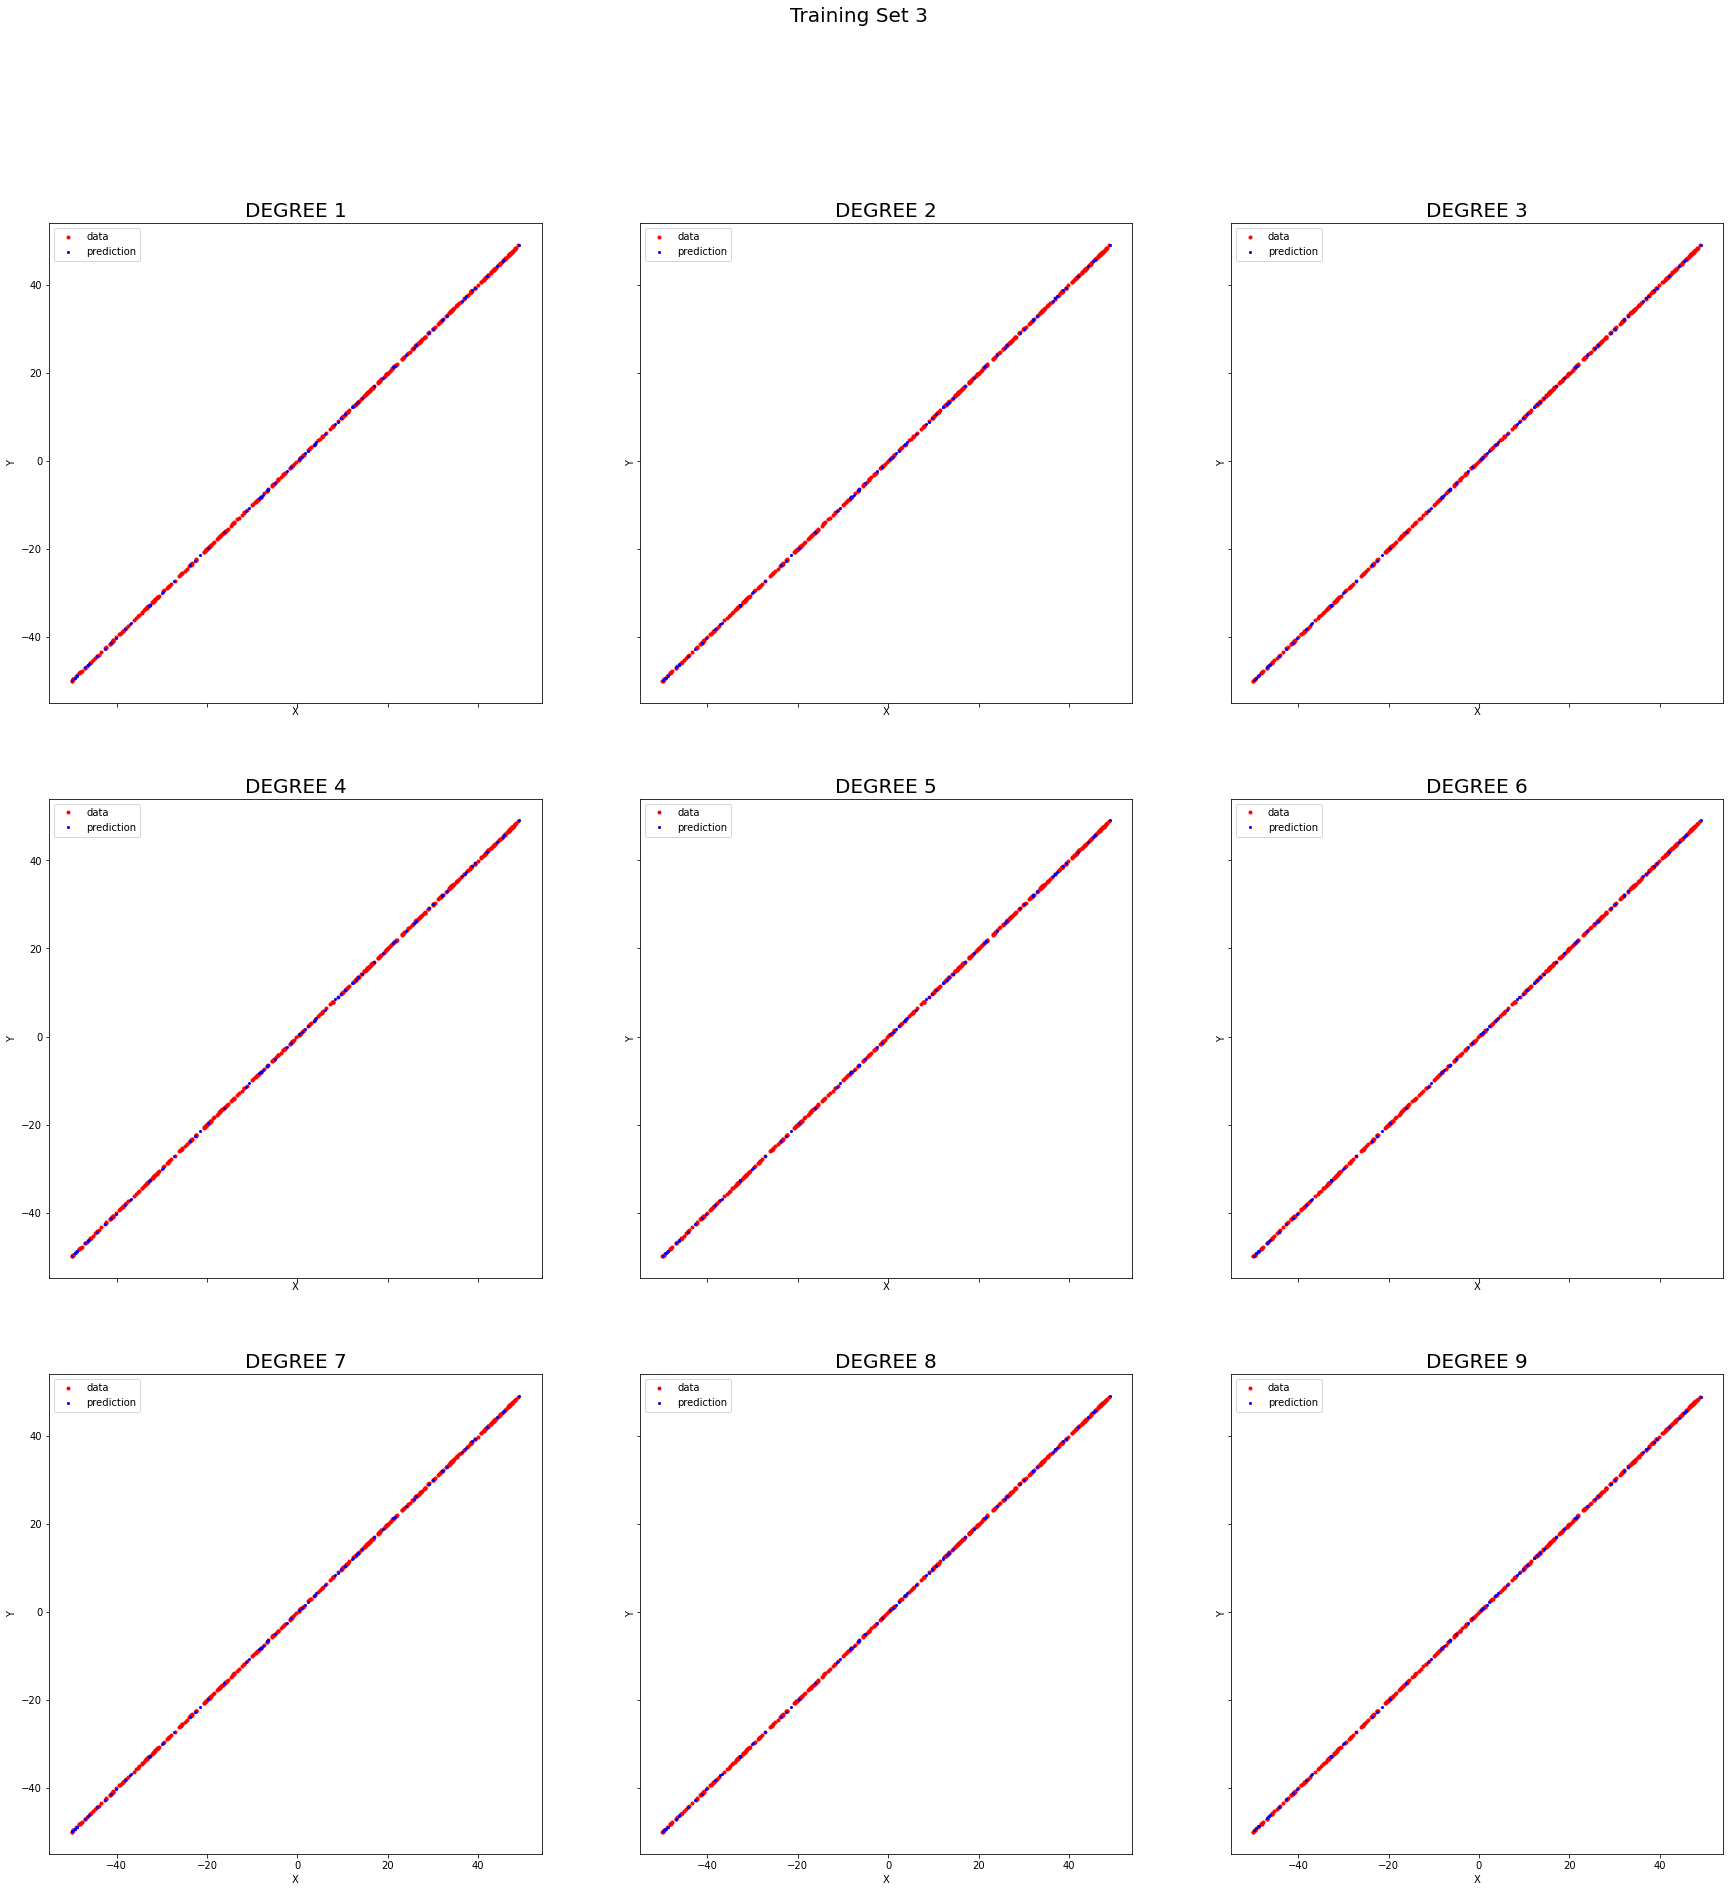

<Figure size 432x288 with 0 Axes>

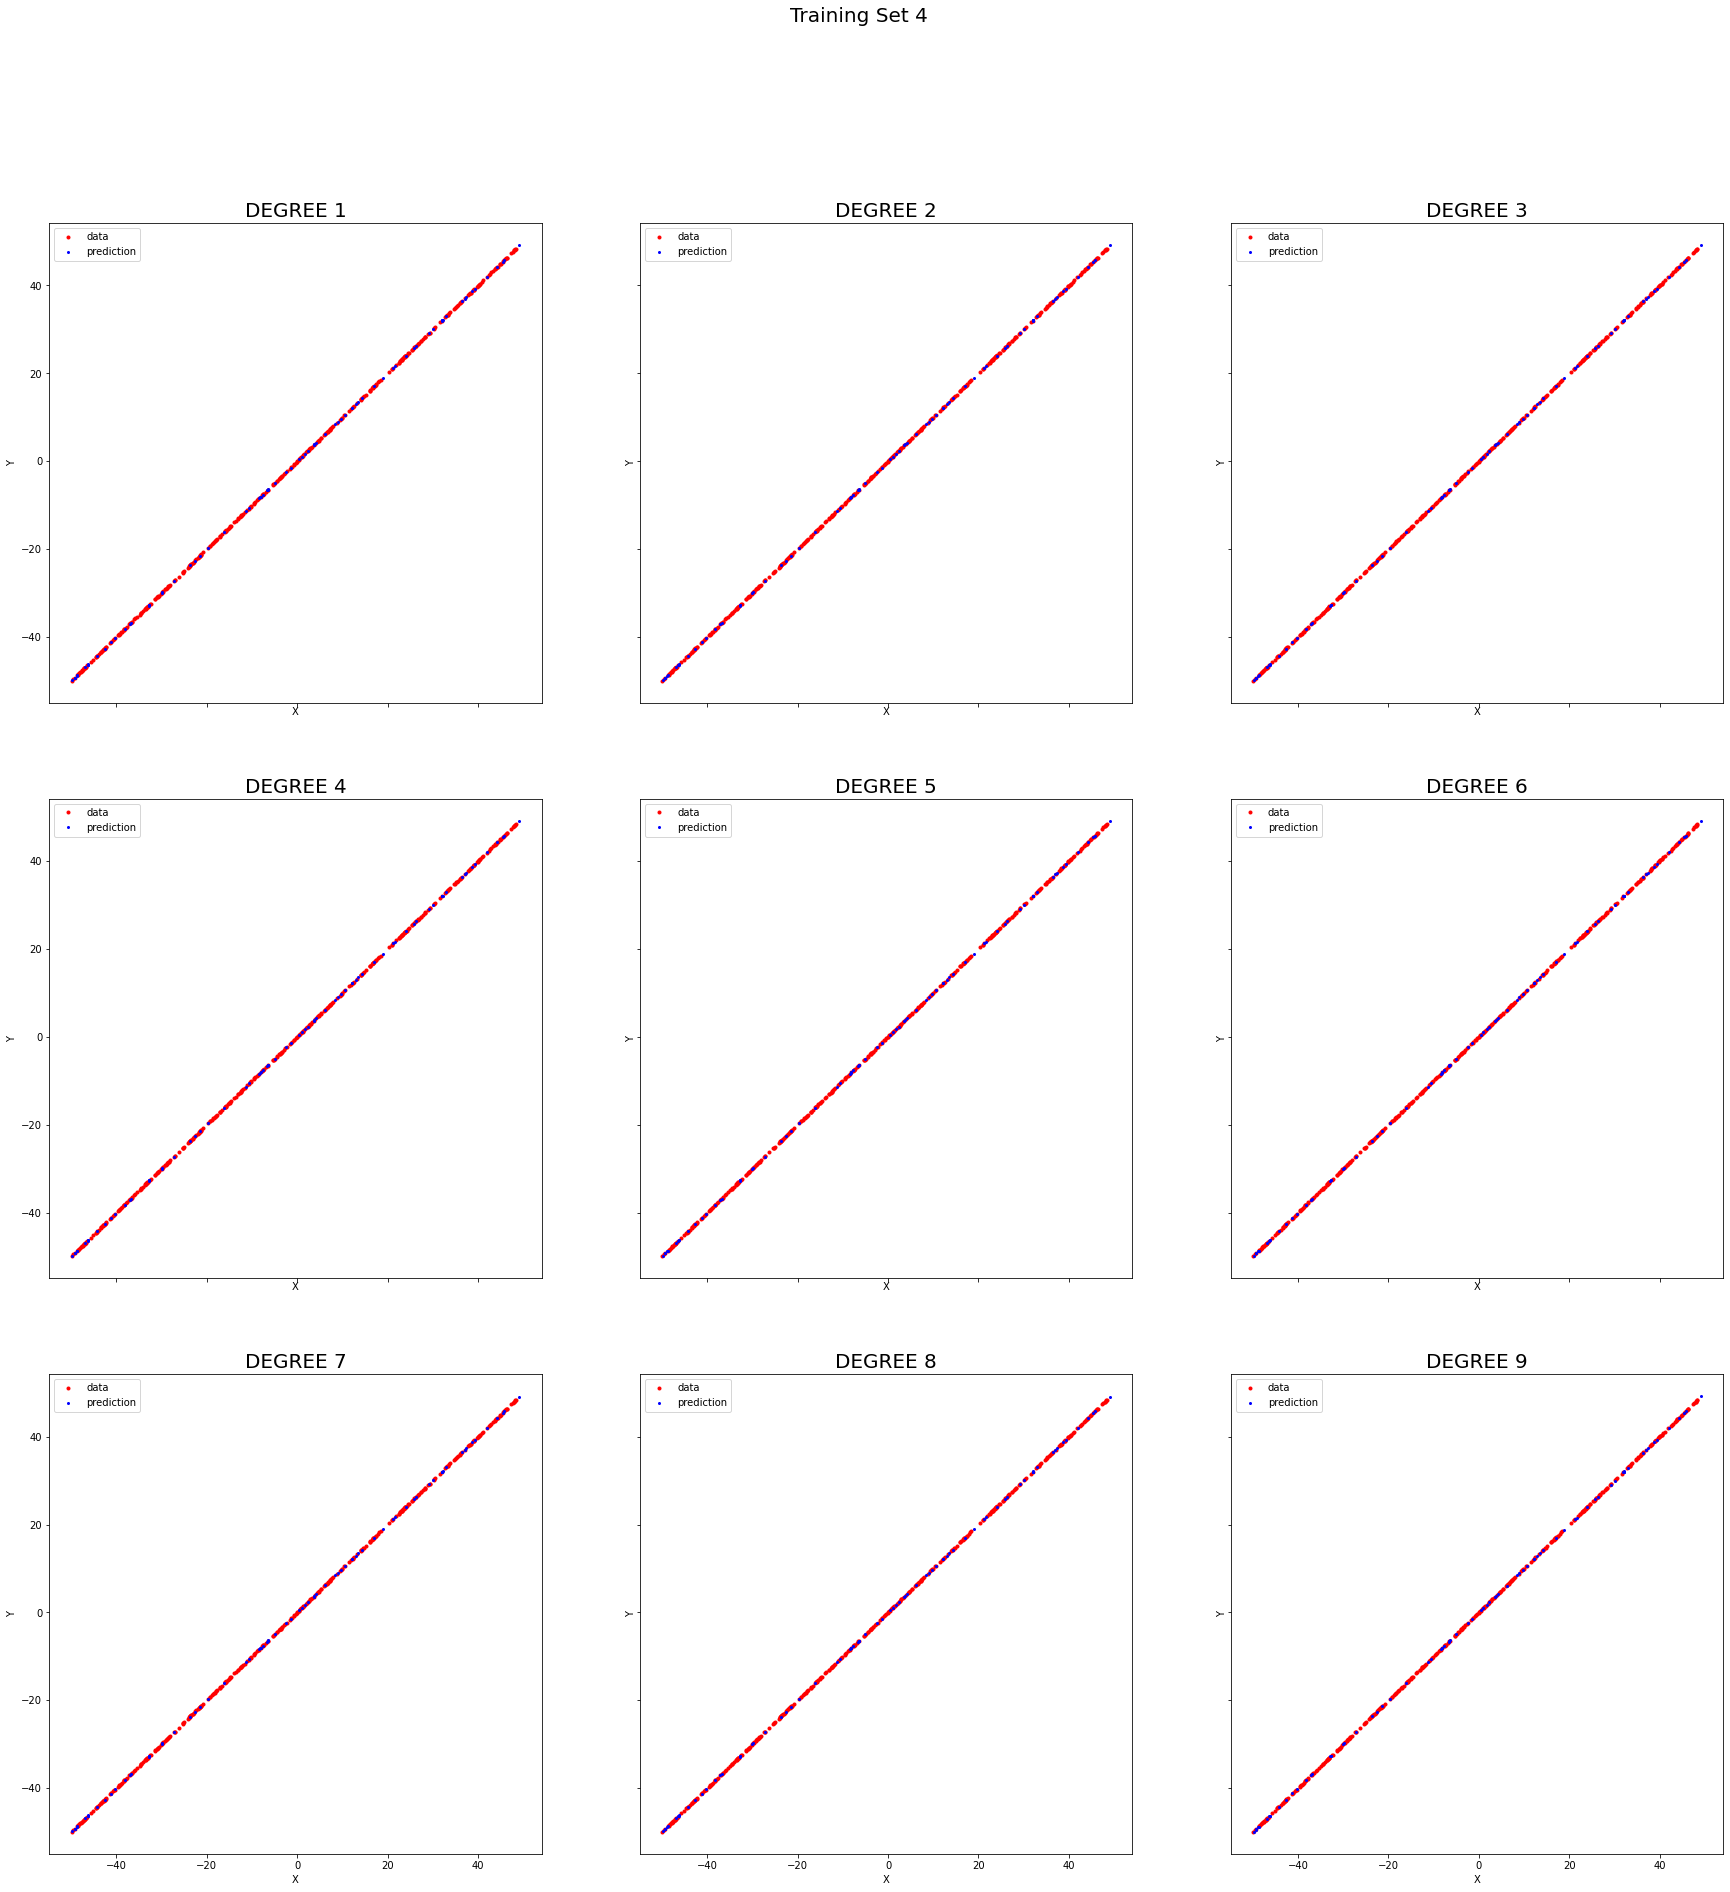

<Figure size 432x288 with 0 Axes>

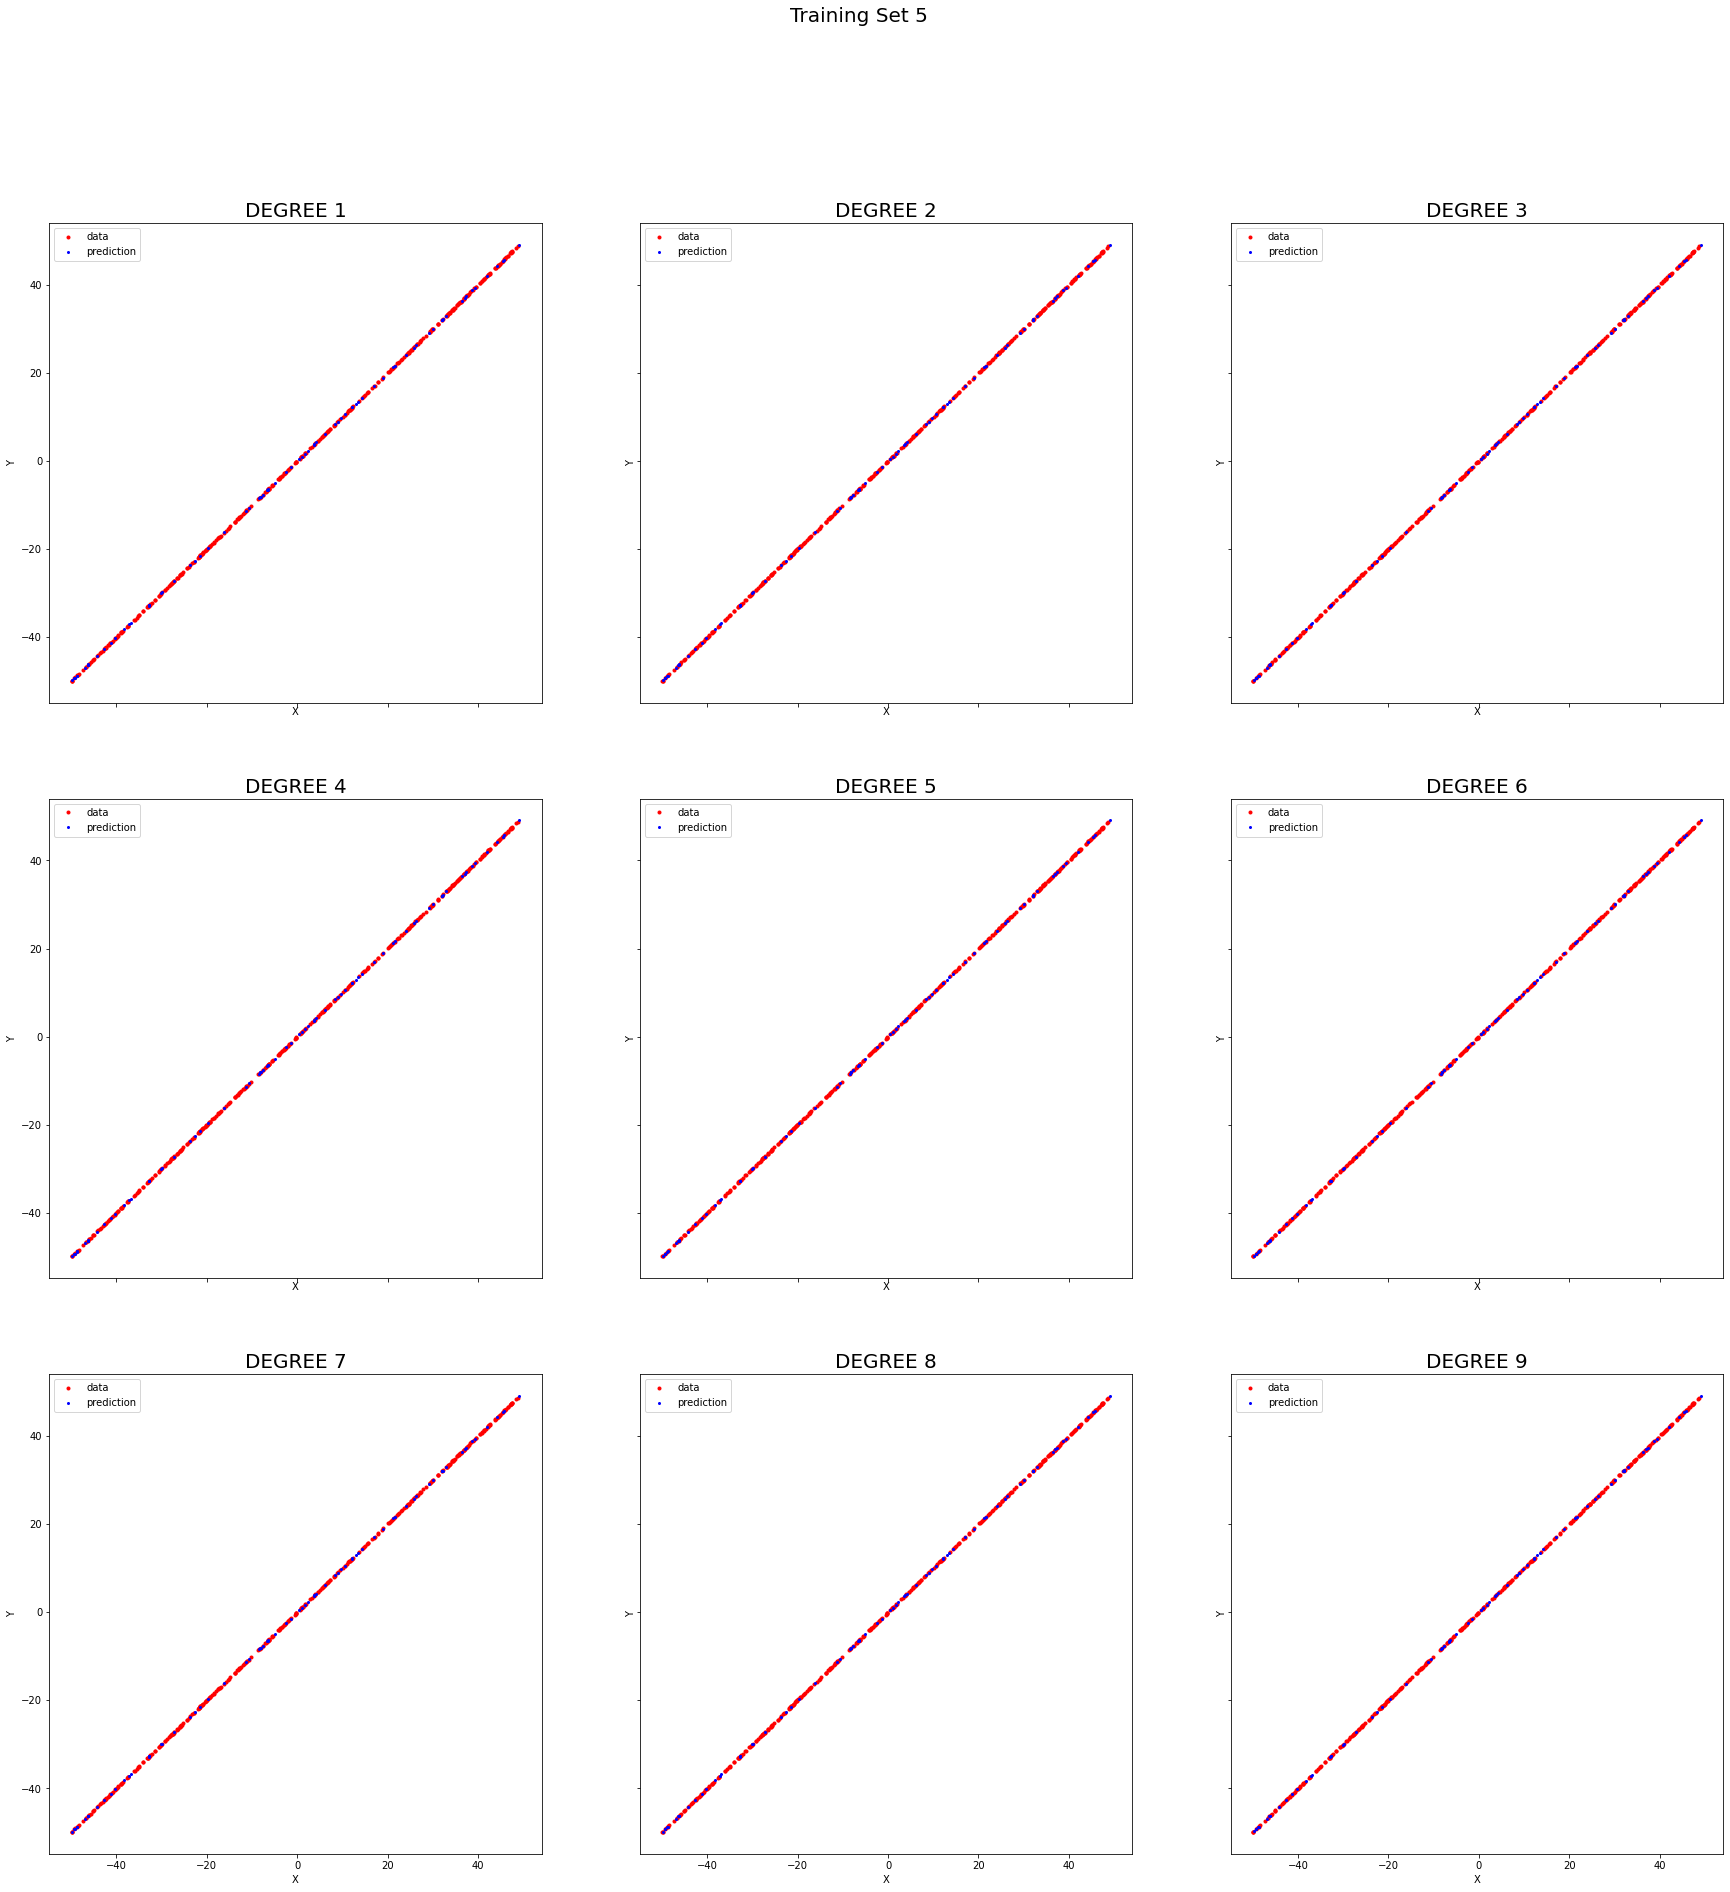

<Figure size 432x288 with 0 Axes>

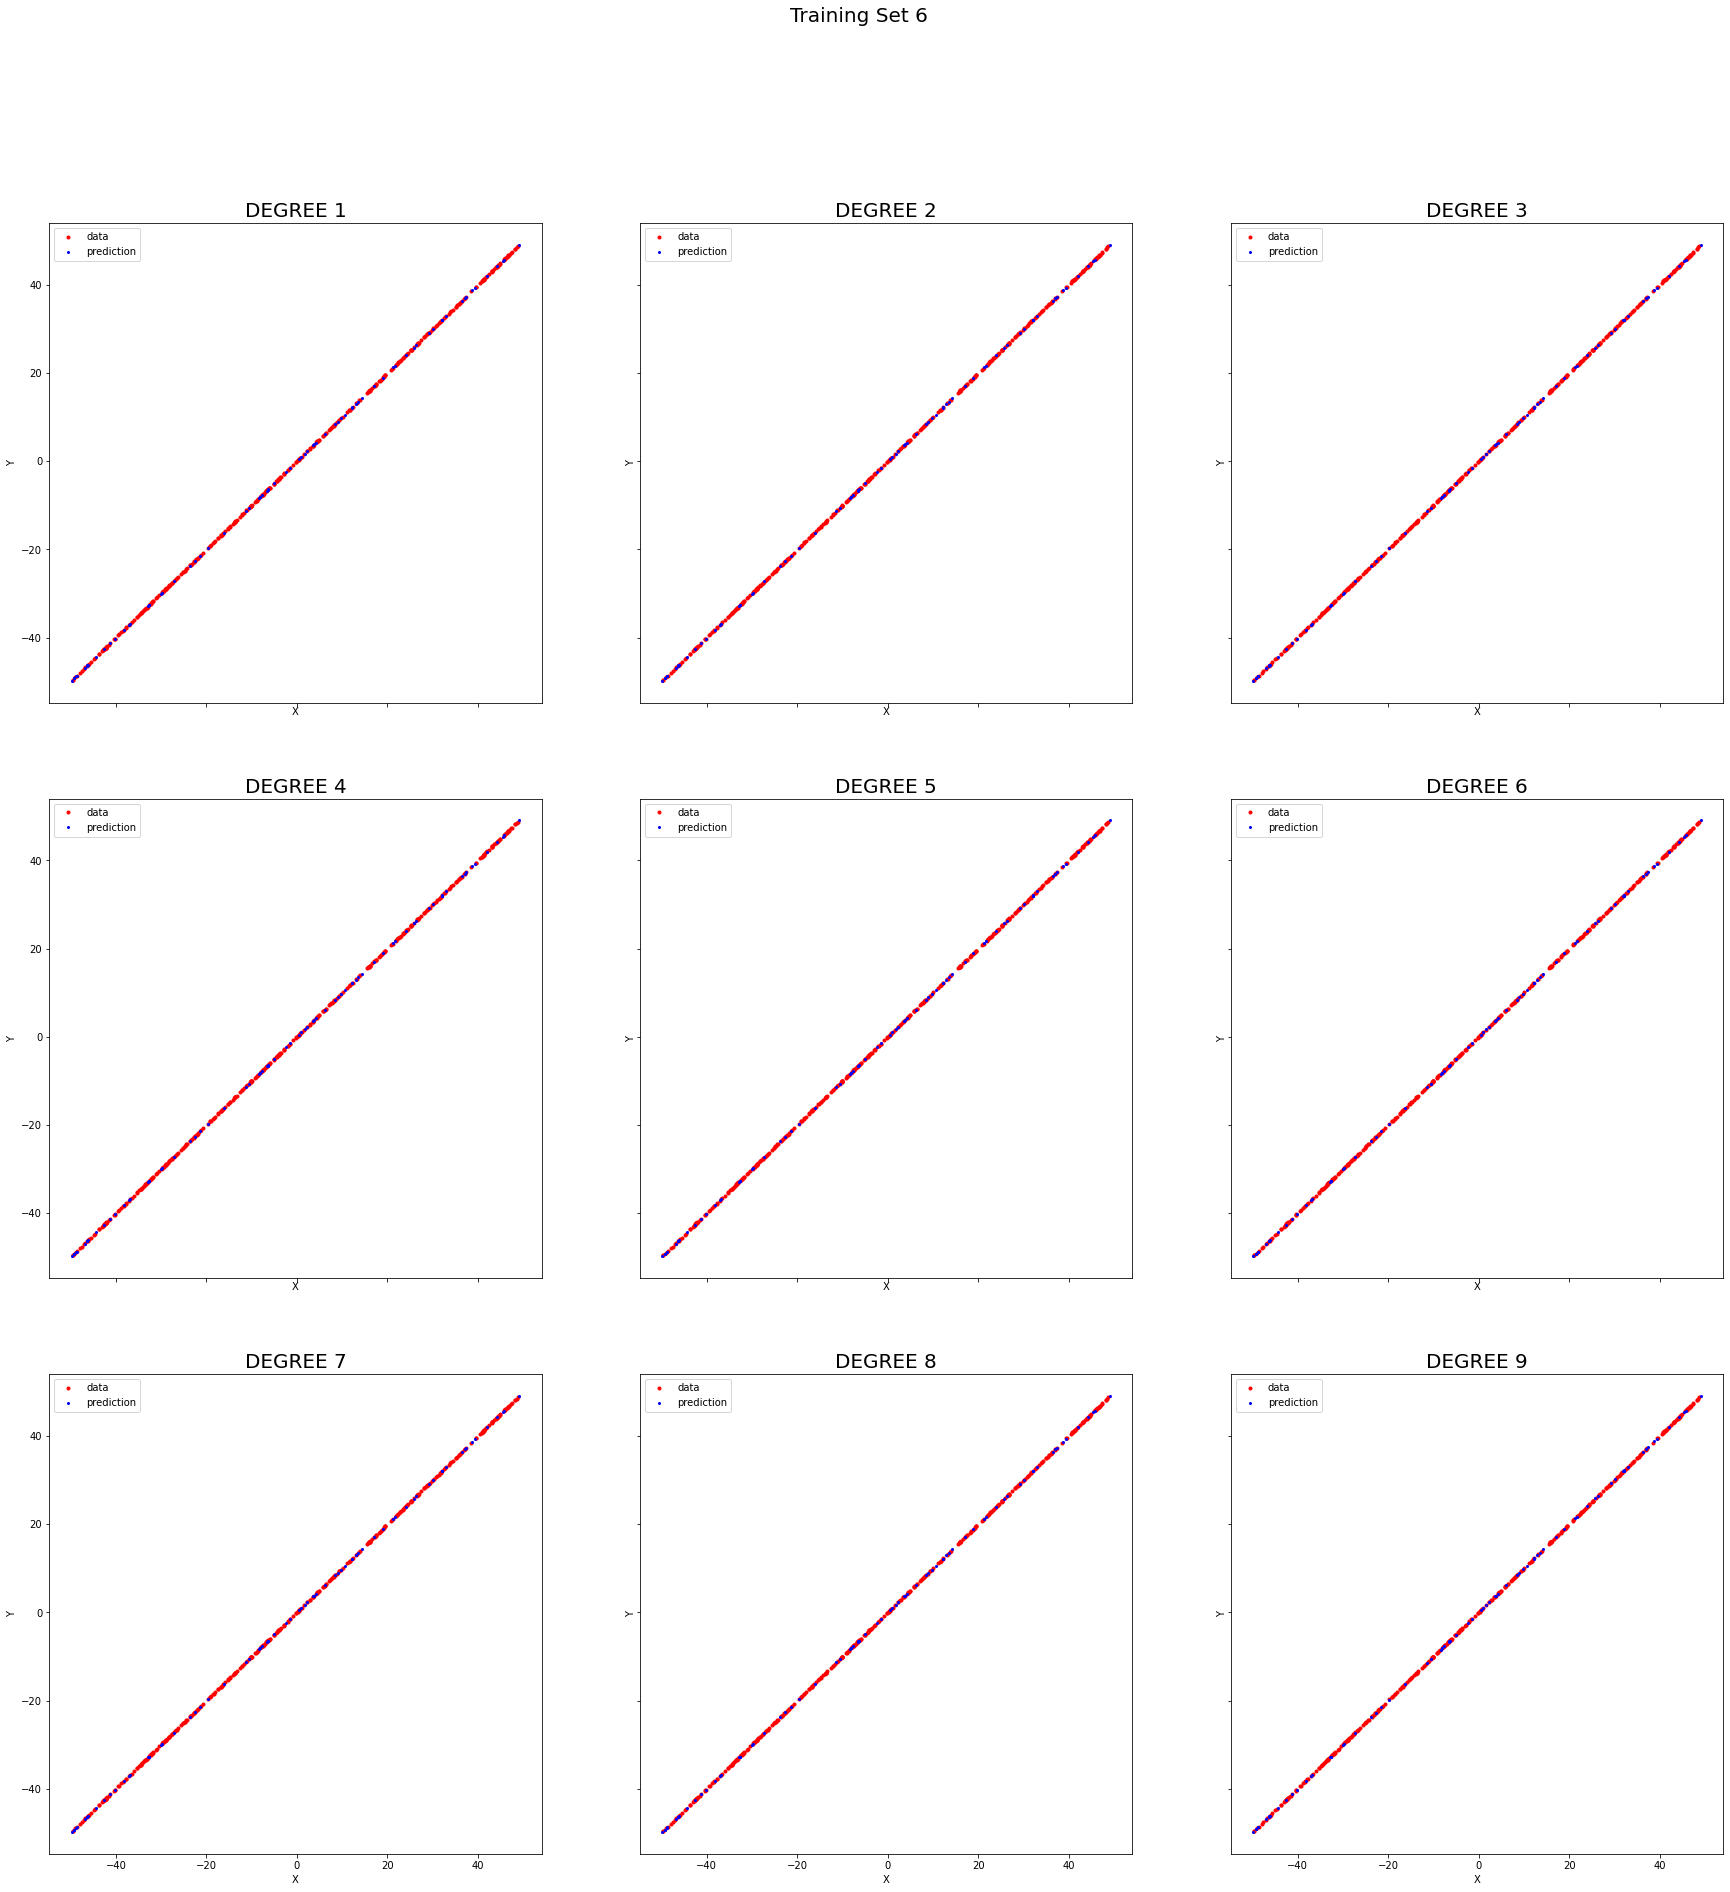

<Figure size 432x288 with 0 Axes>

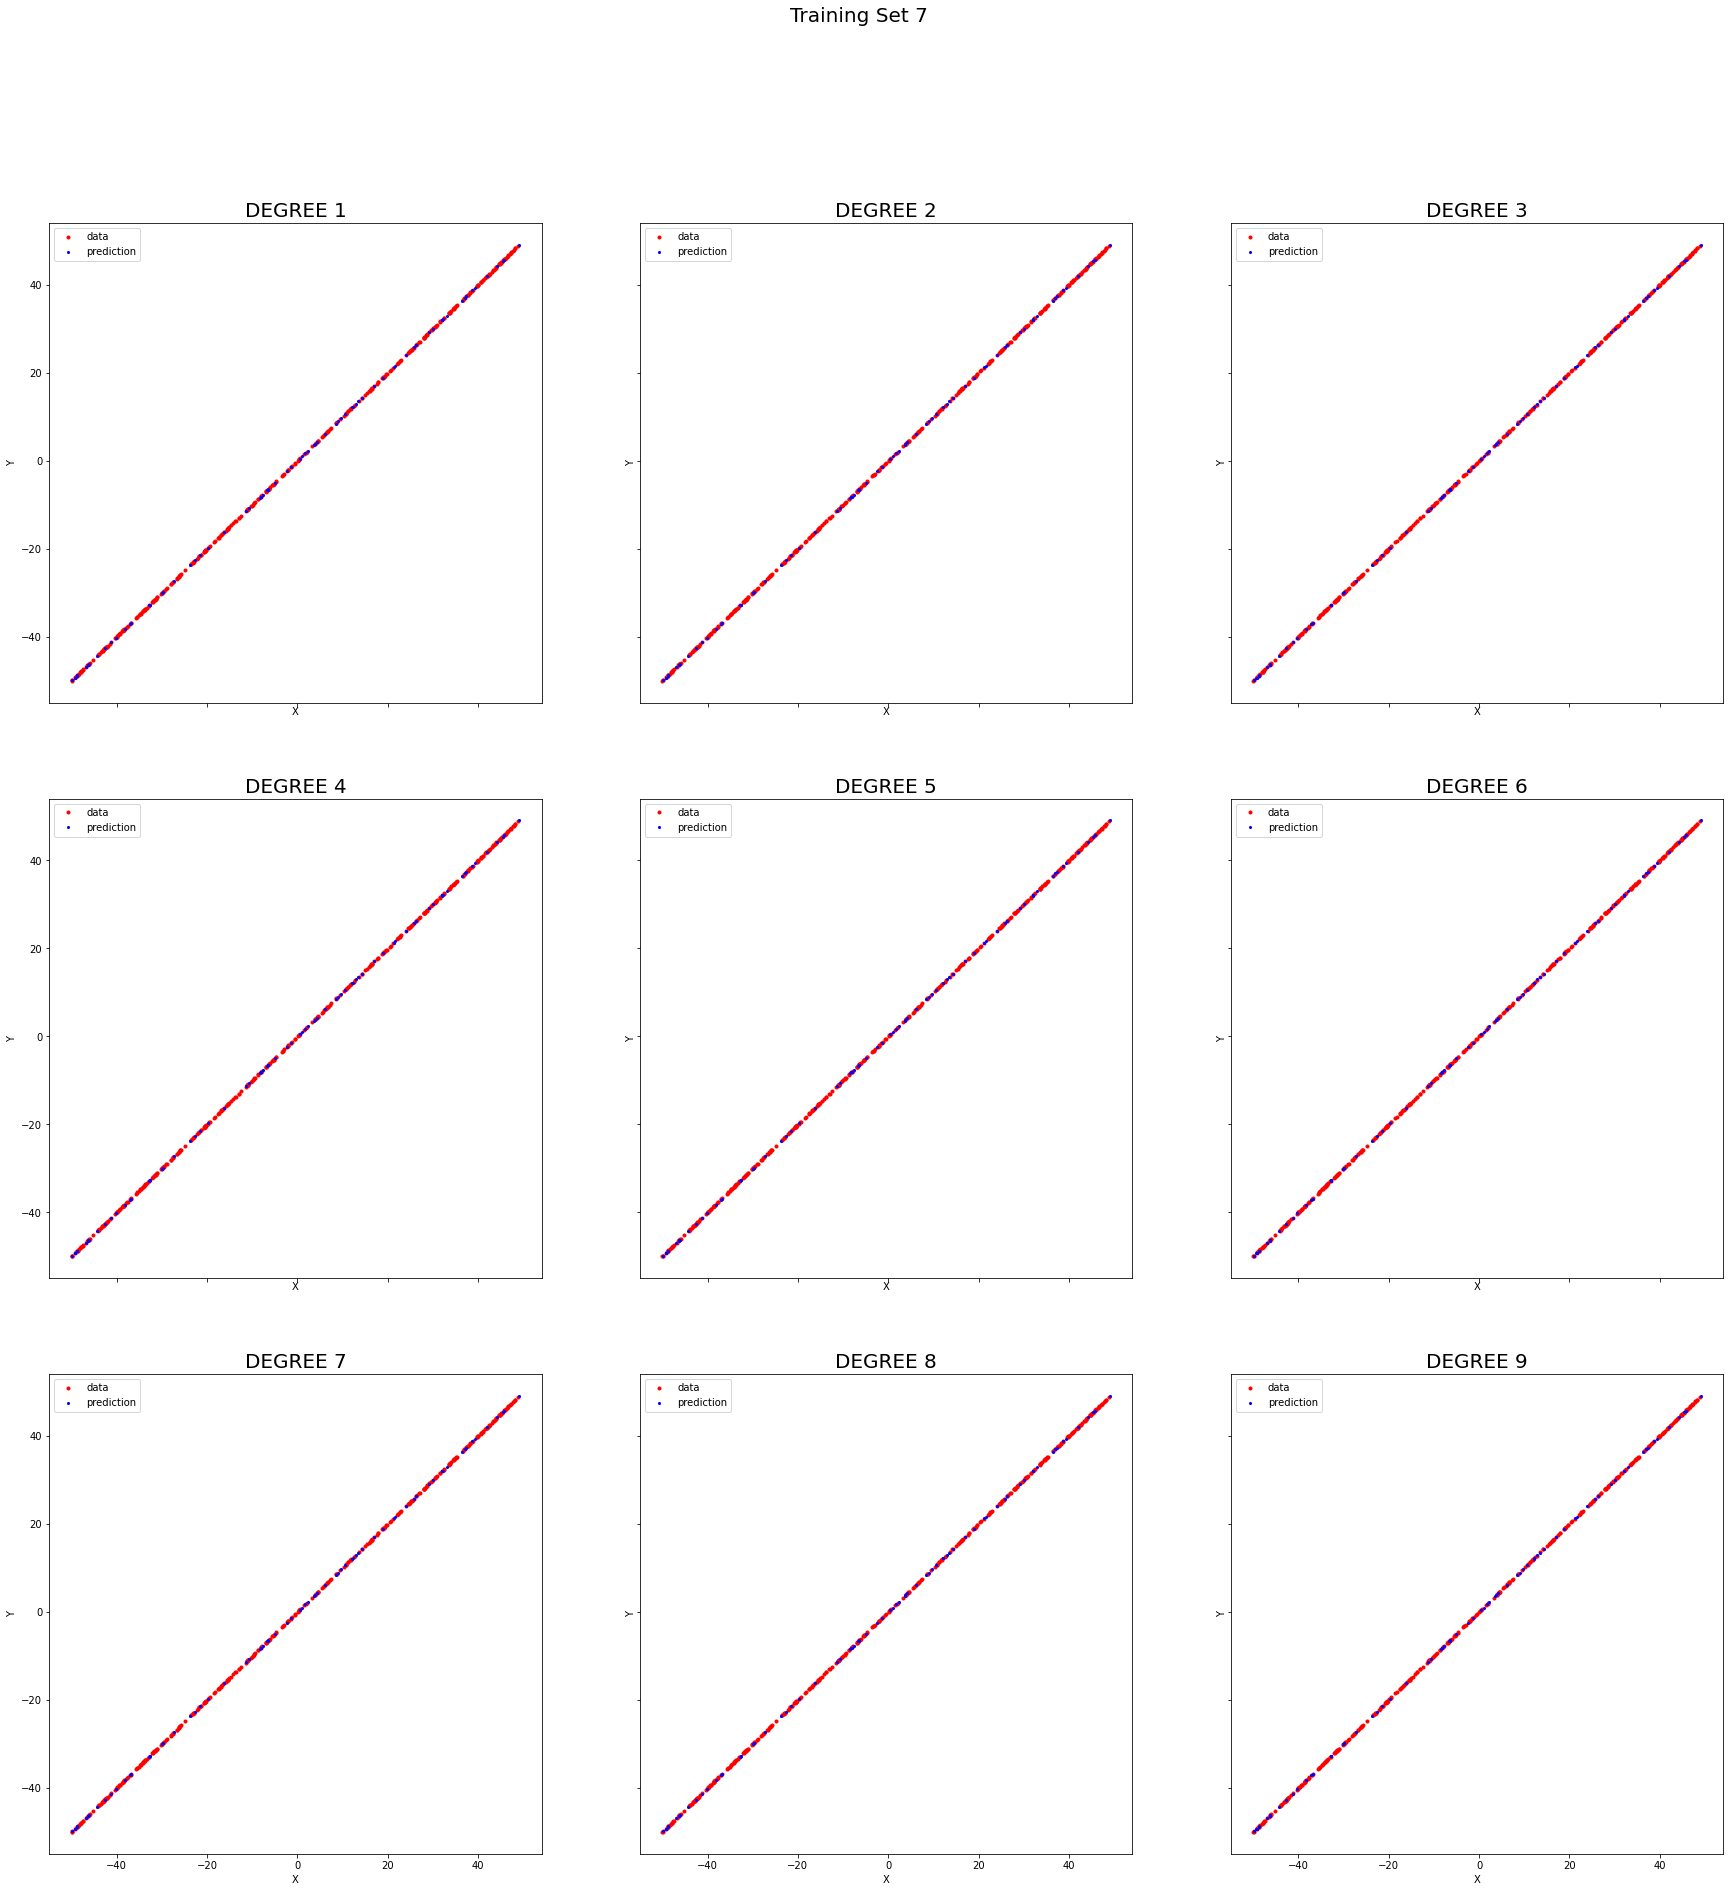

<Figure size 432x288 with 0 Axes>

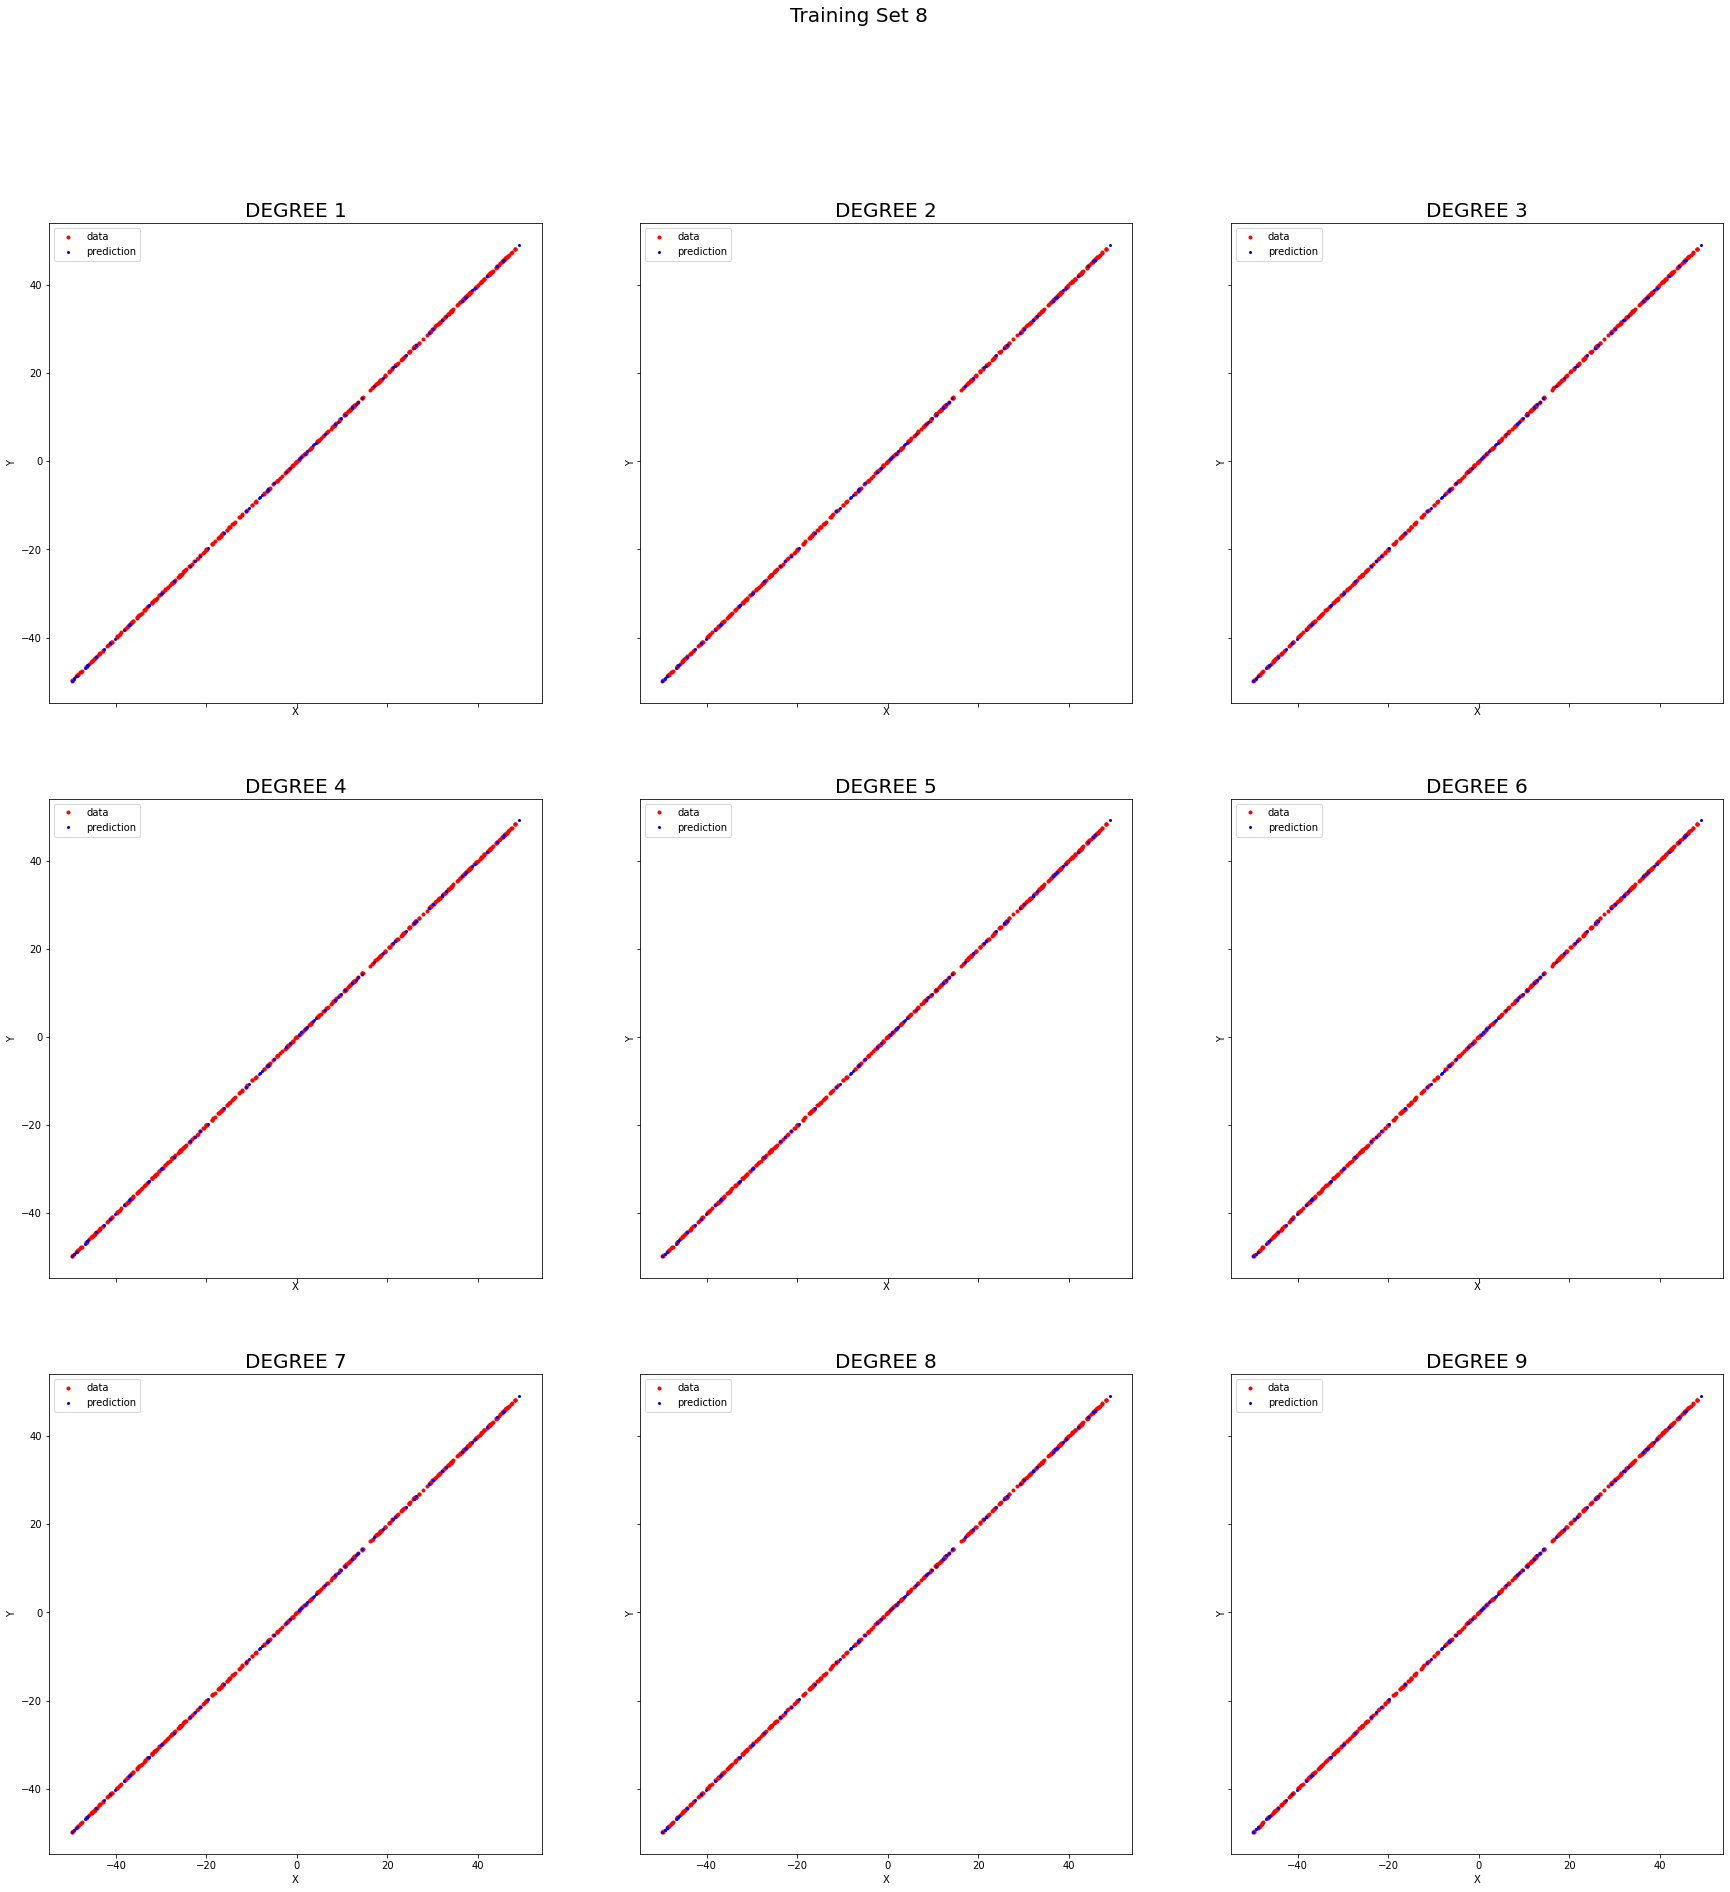

<Figure size 432x288 with 0 Axes>

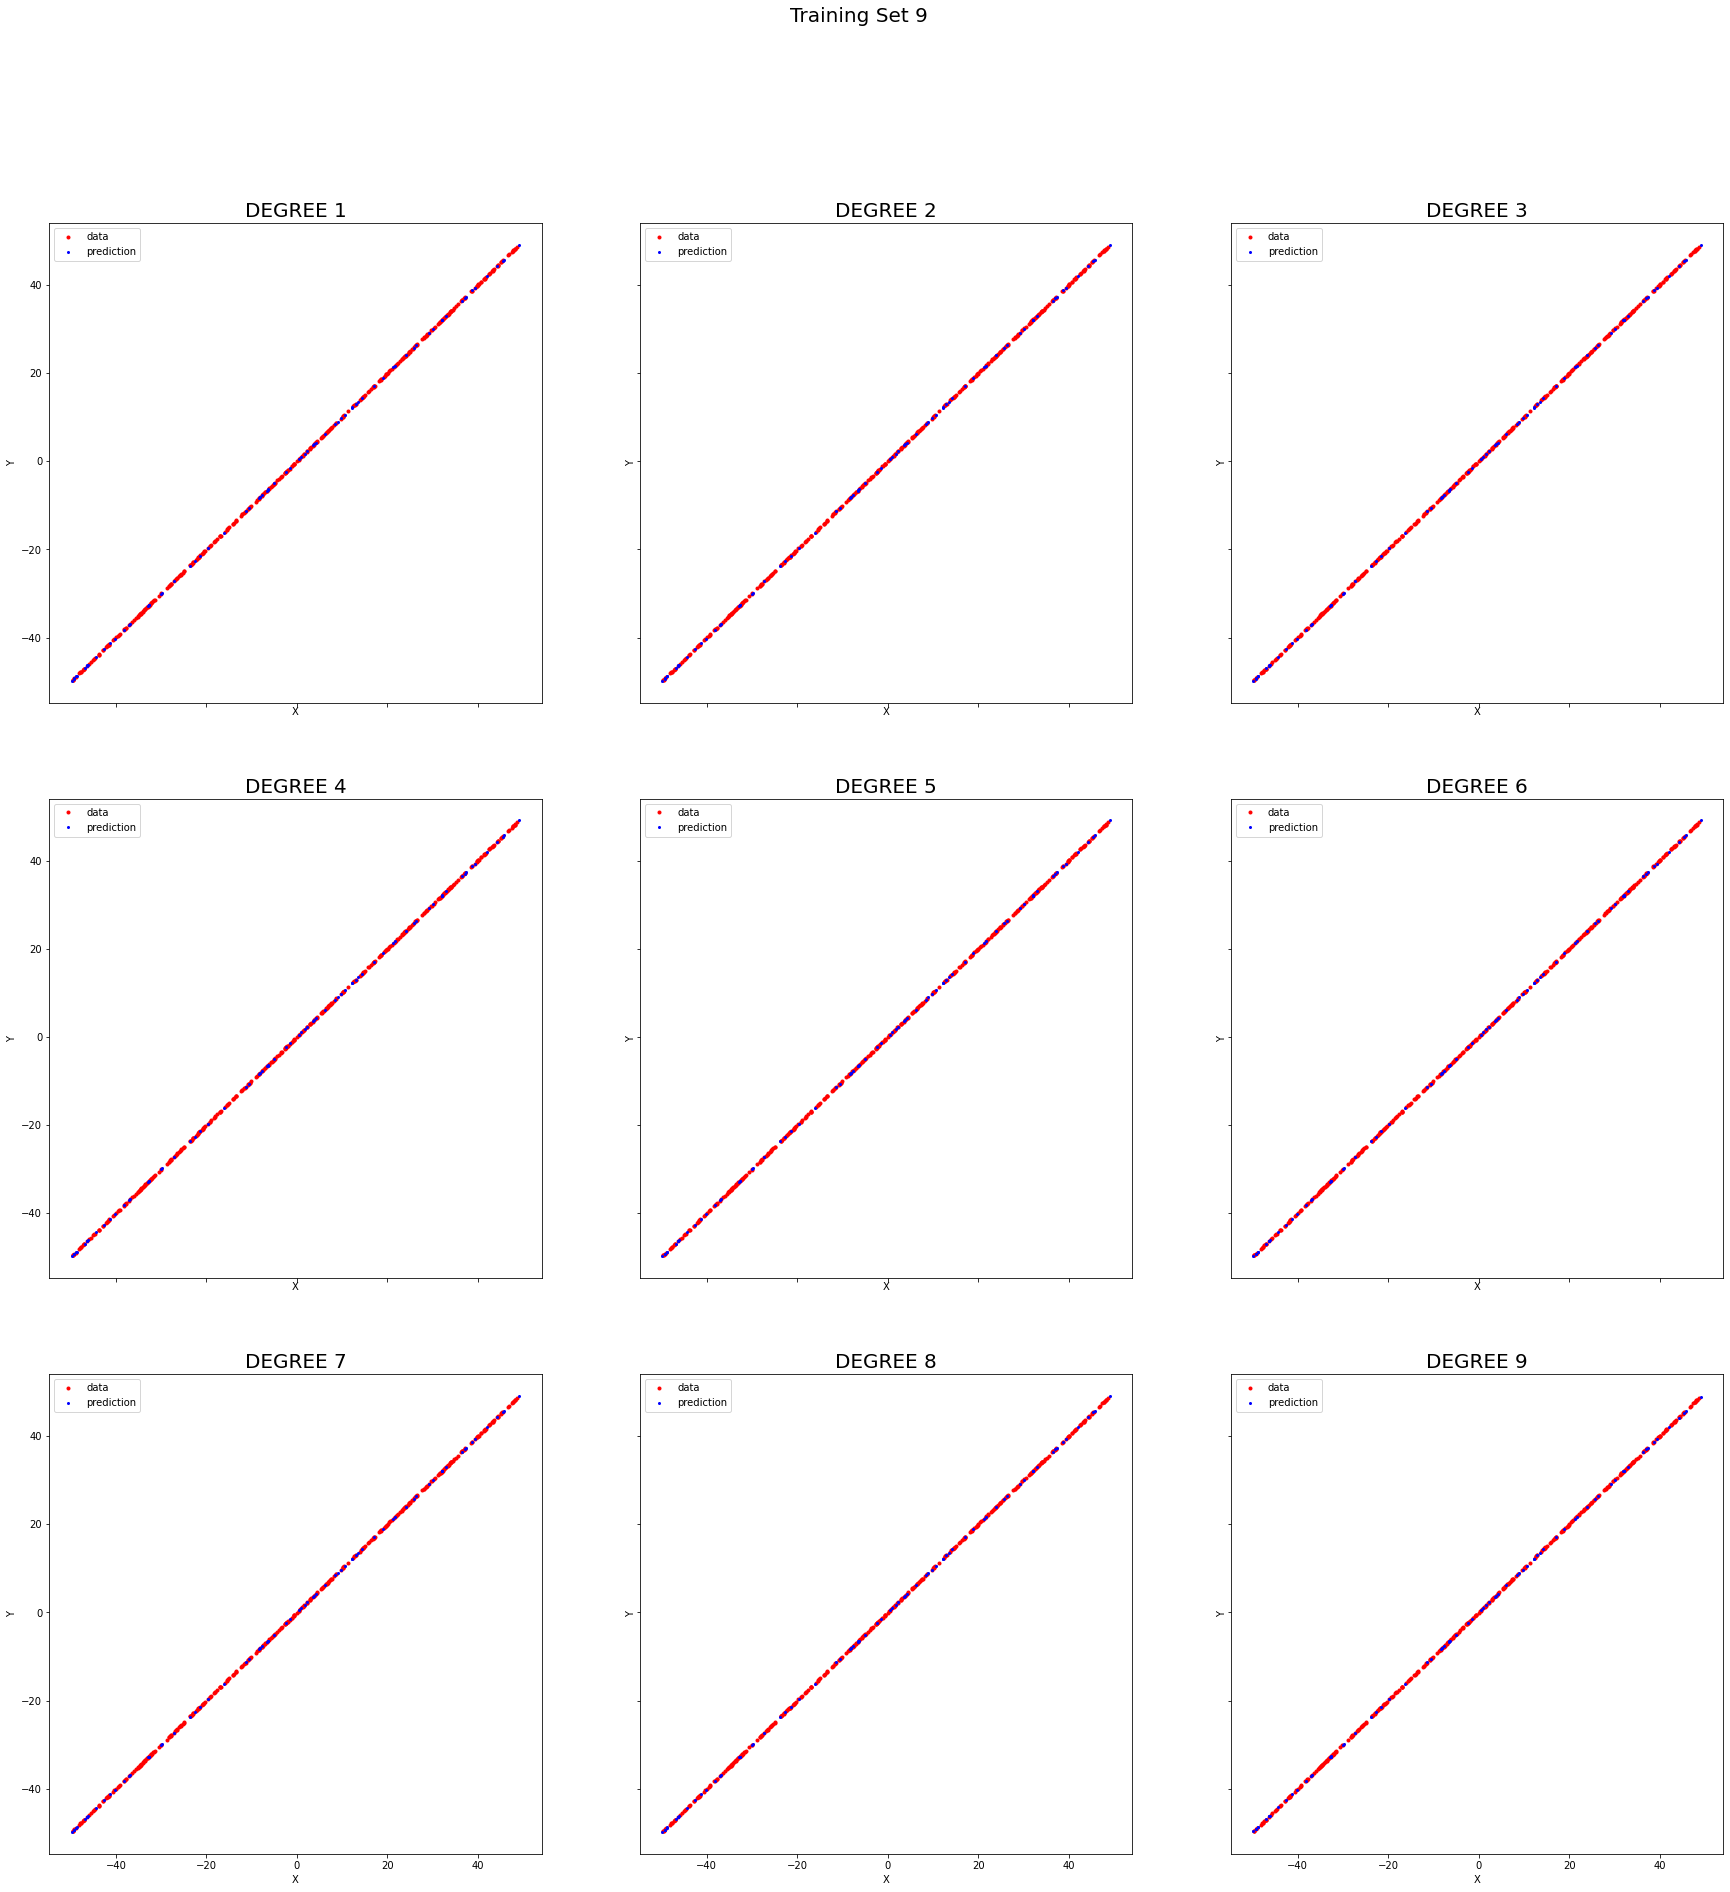

<Figure size 432x288 with 0 Axes>

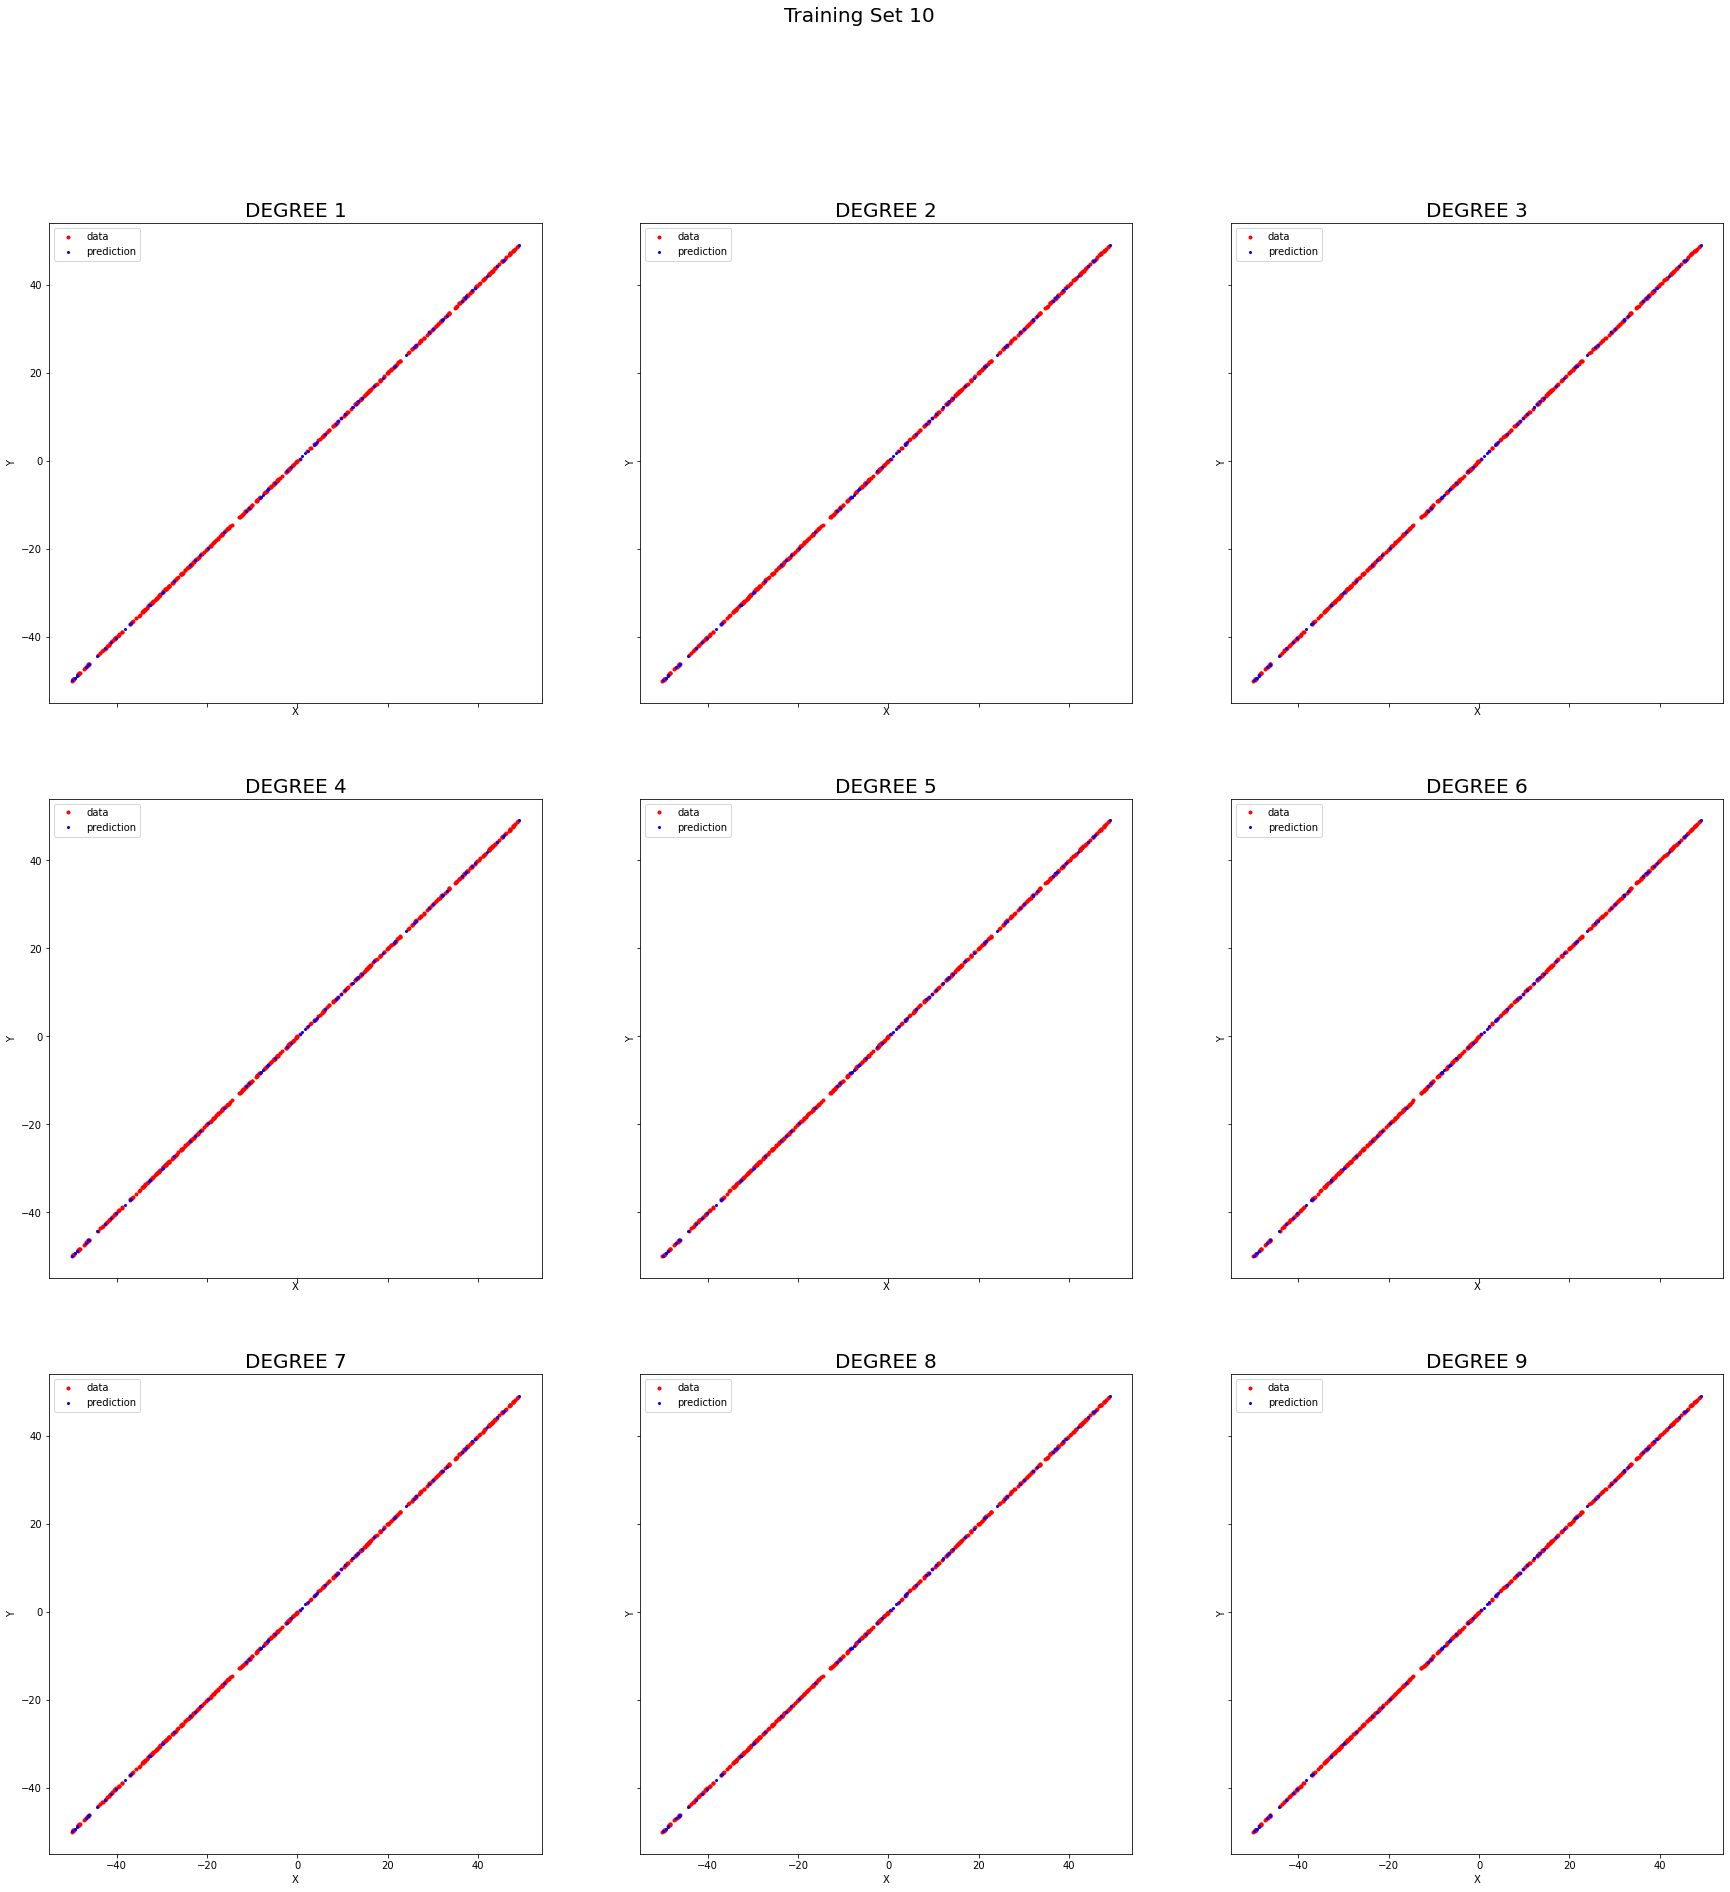

<Figure size 432x288 with 0 Axes>

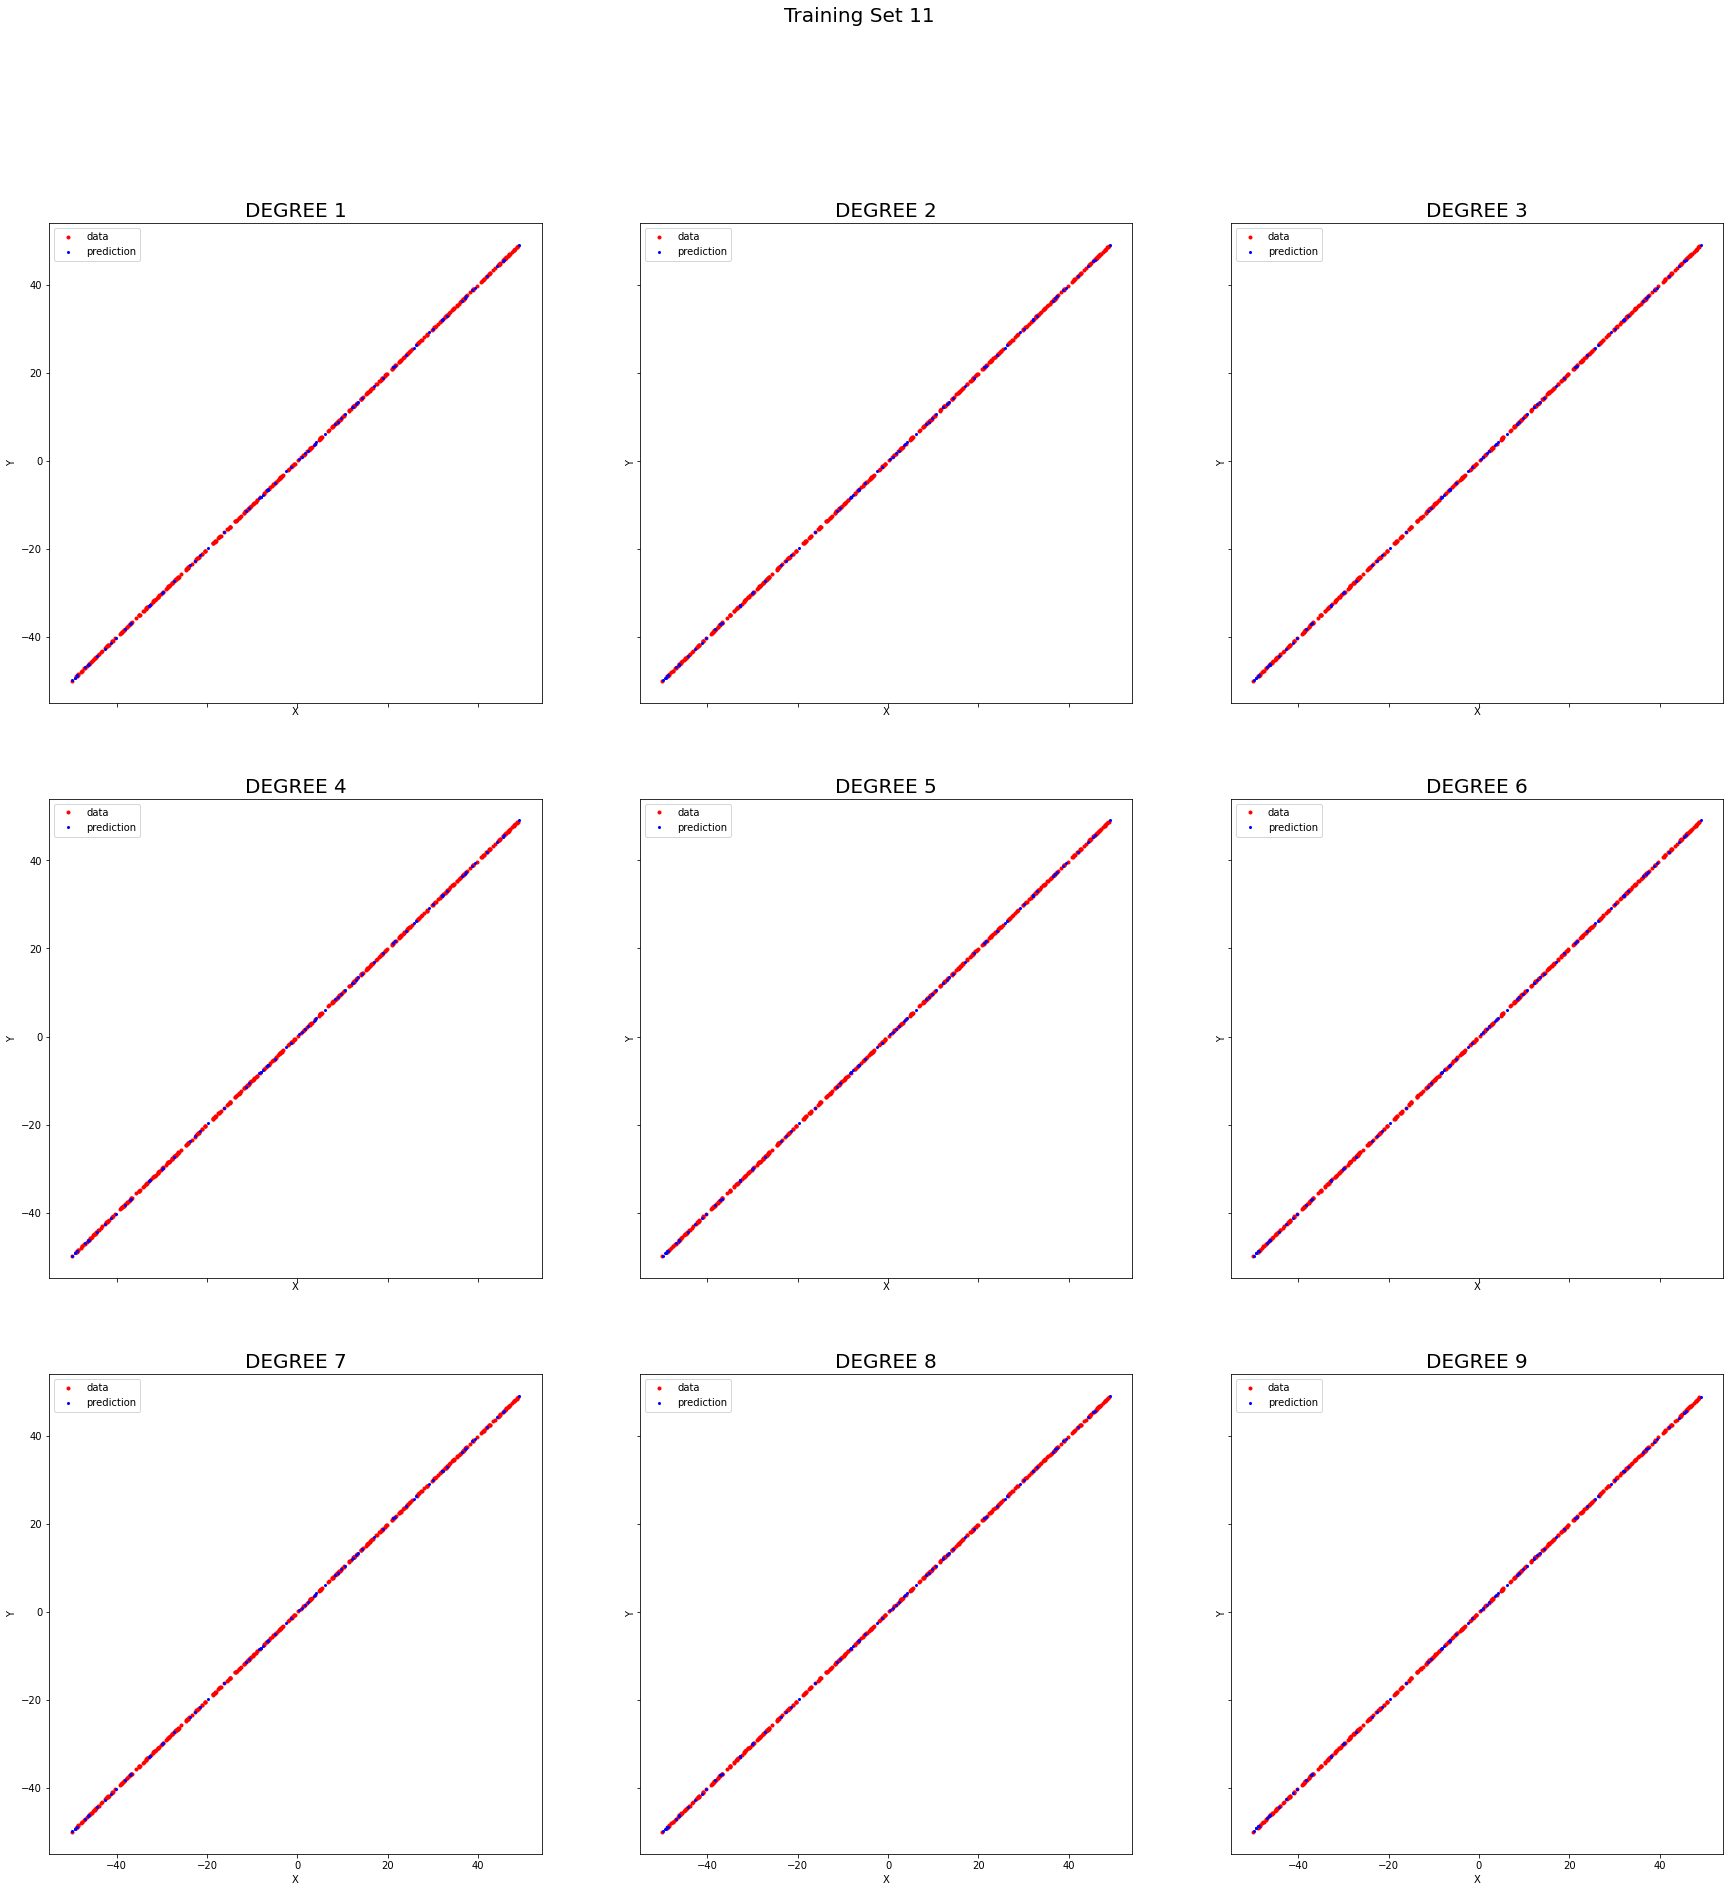

<Figure size 432x288 with 0 Axes>

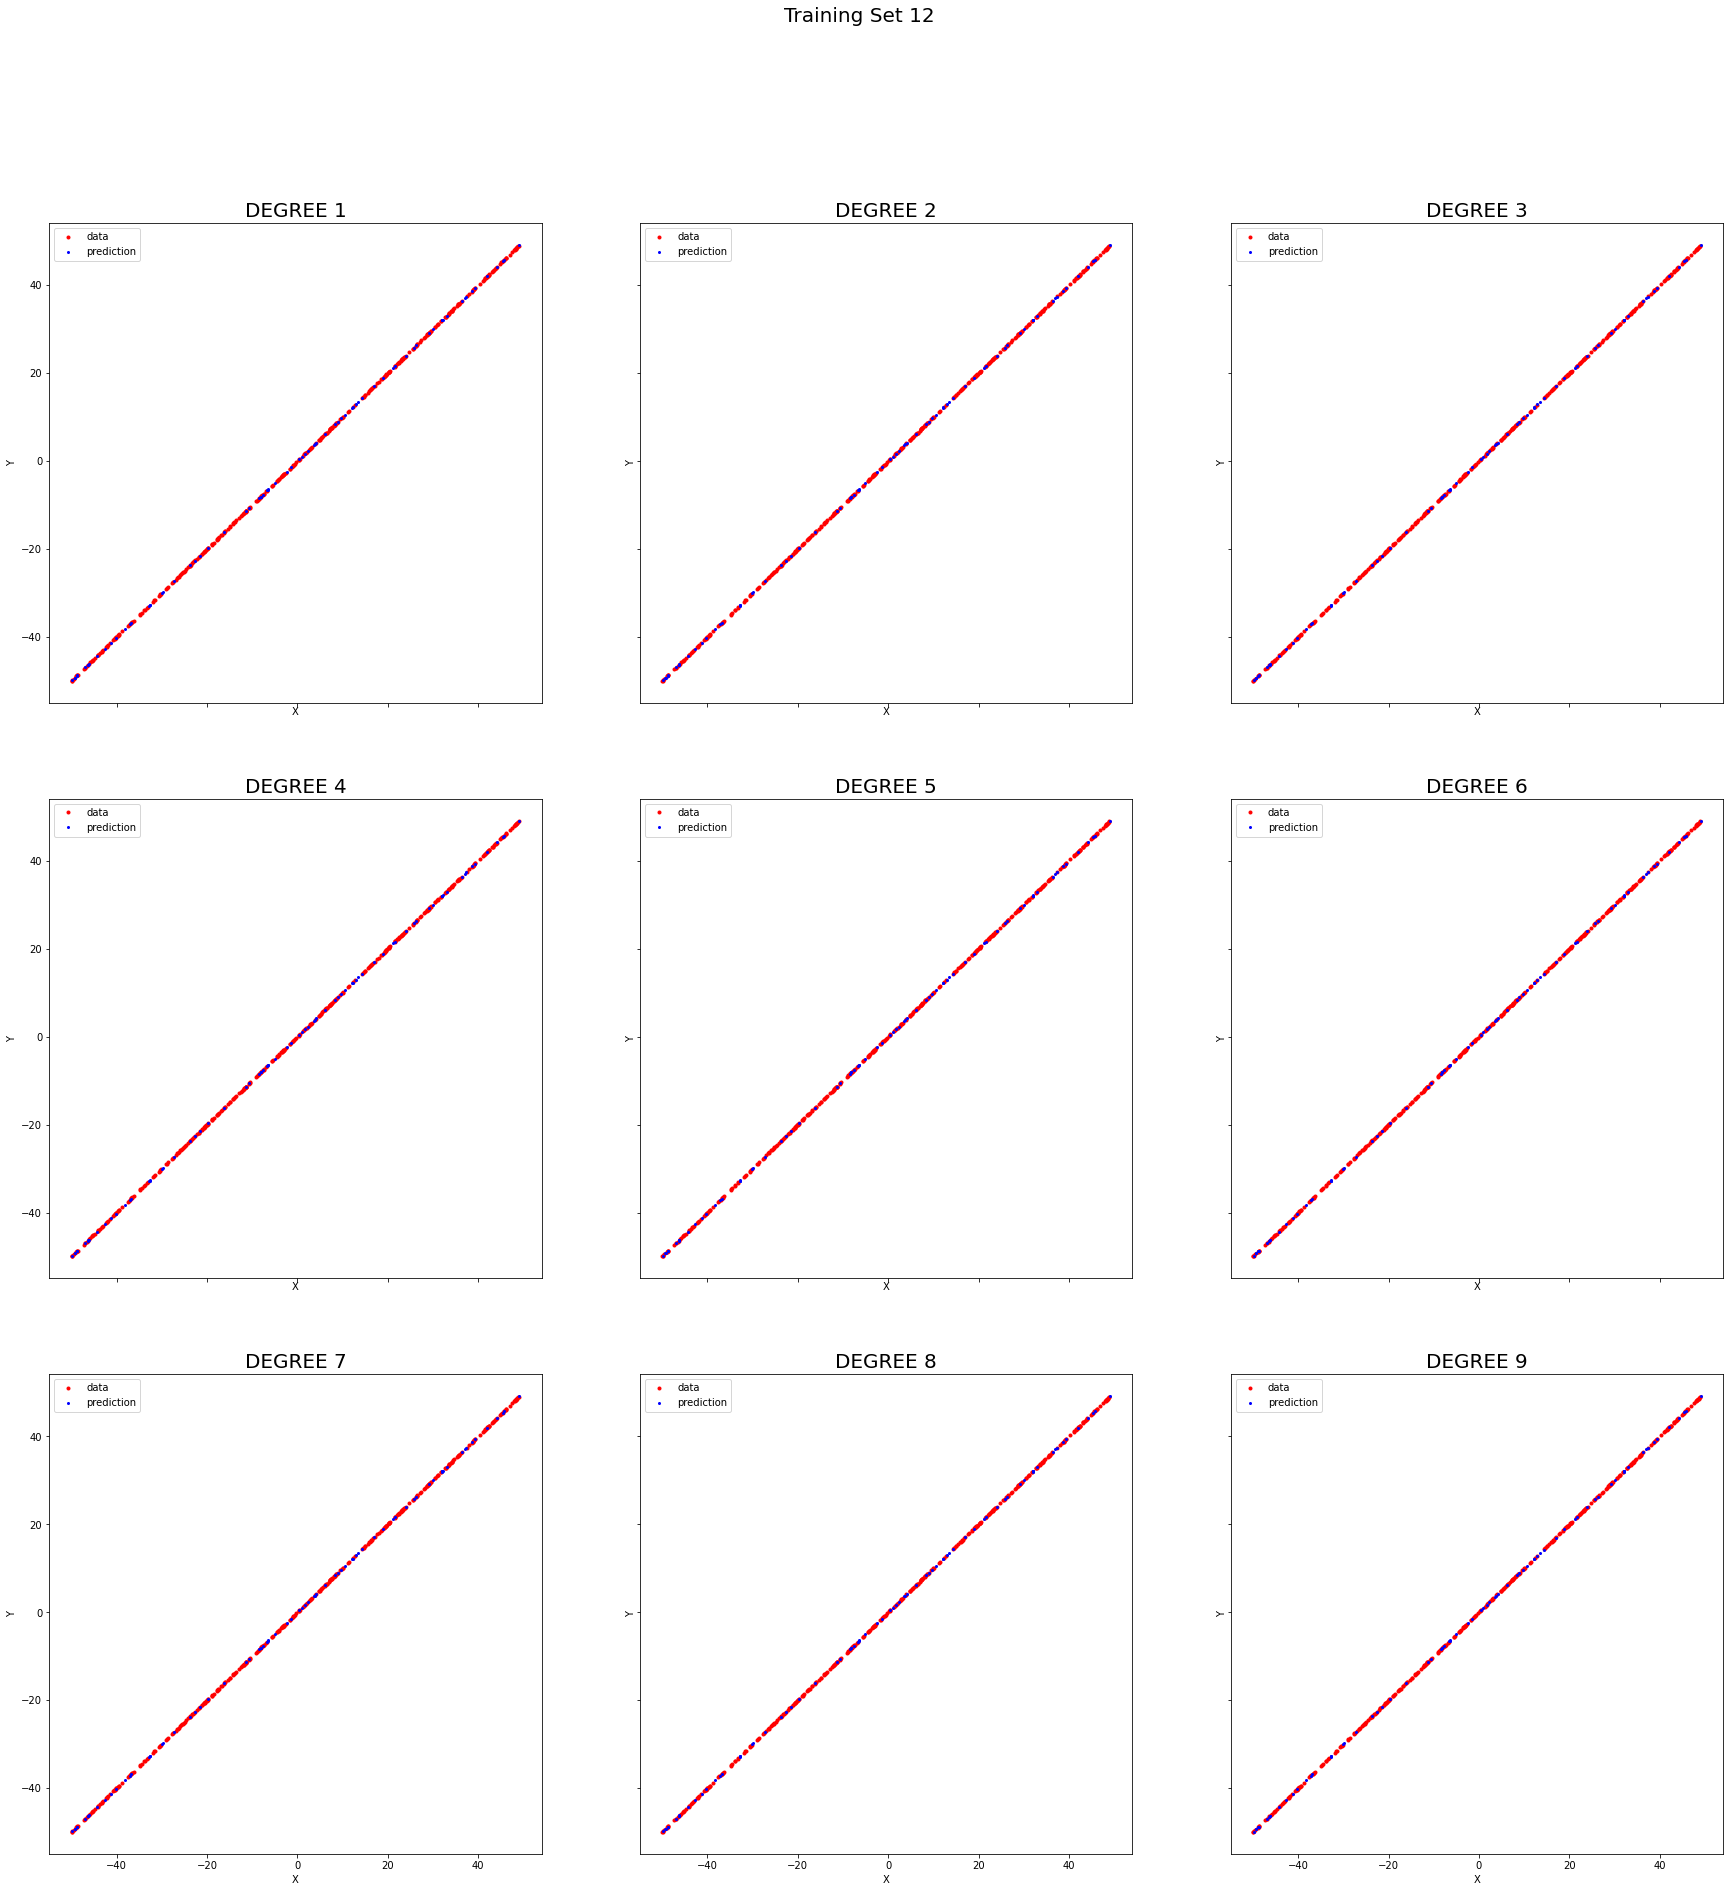

<Figure size 432x288 with 0 Axes>

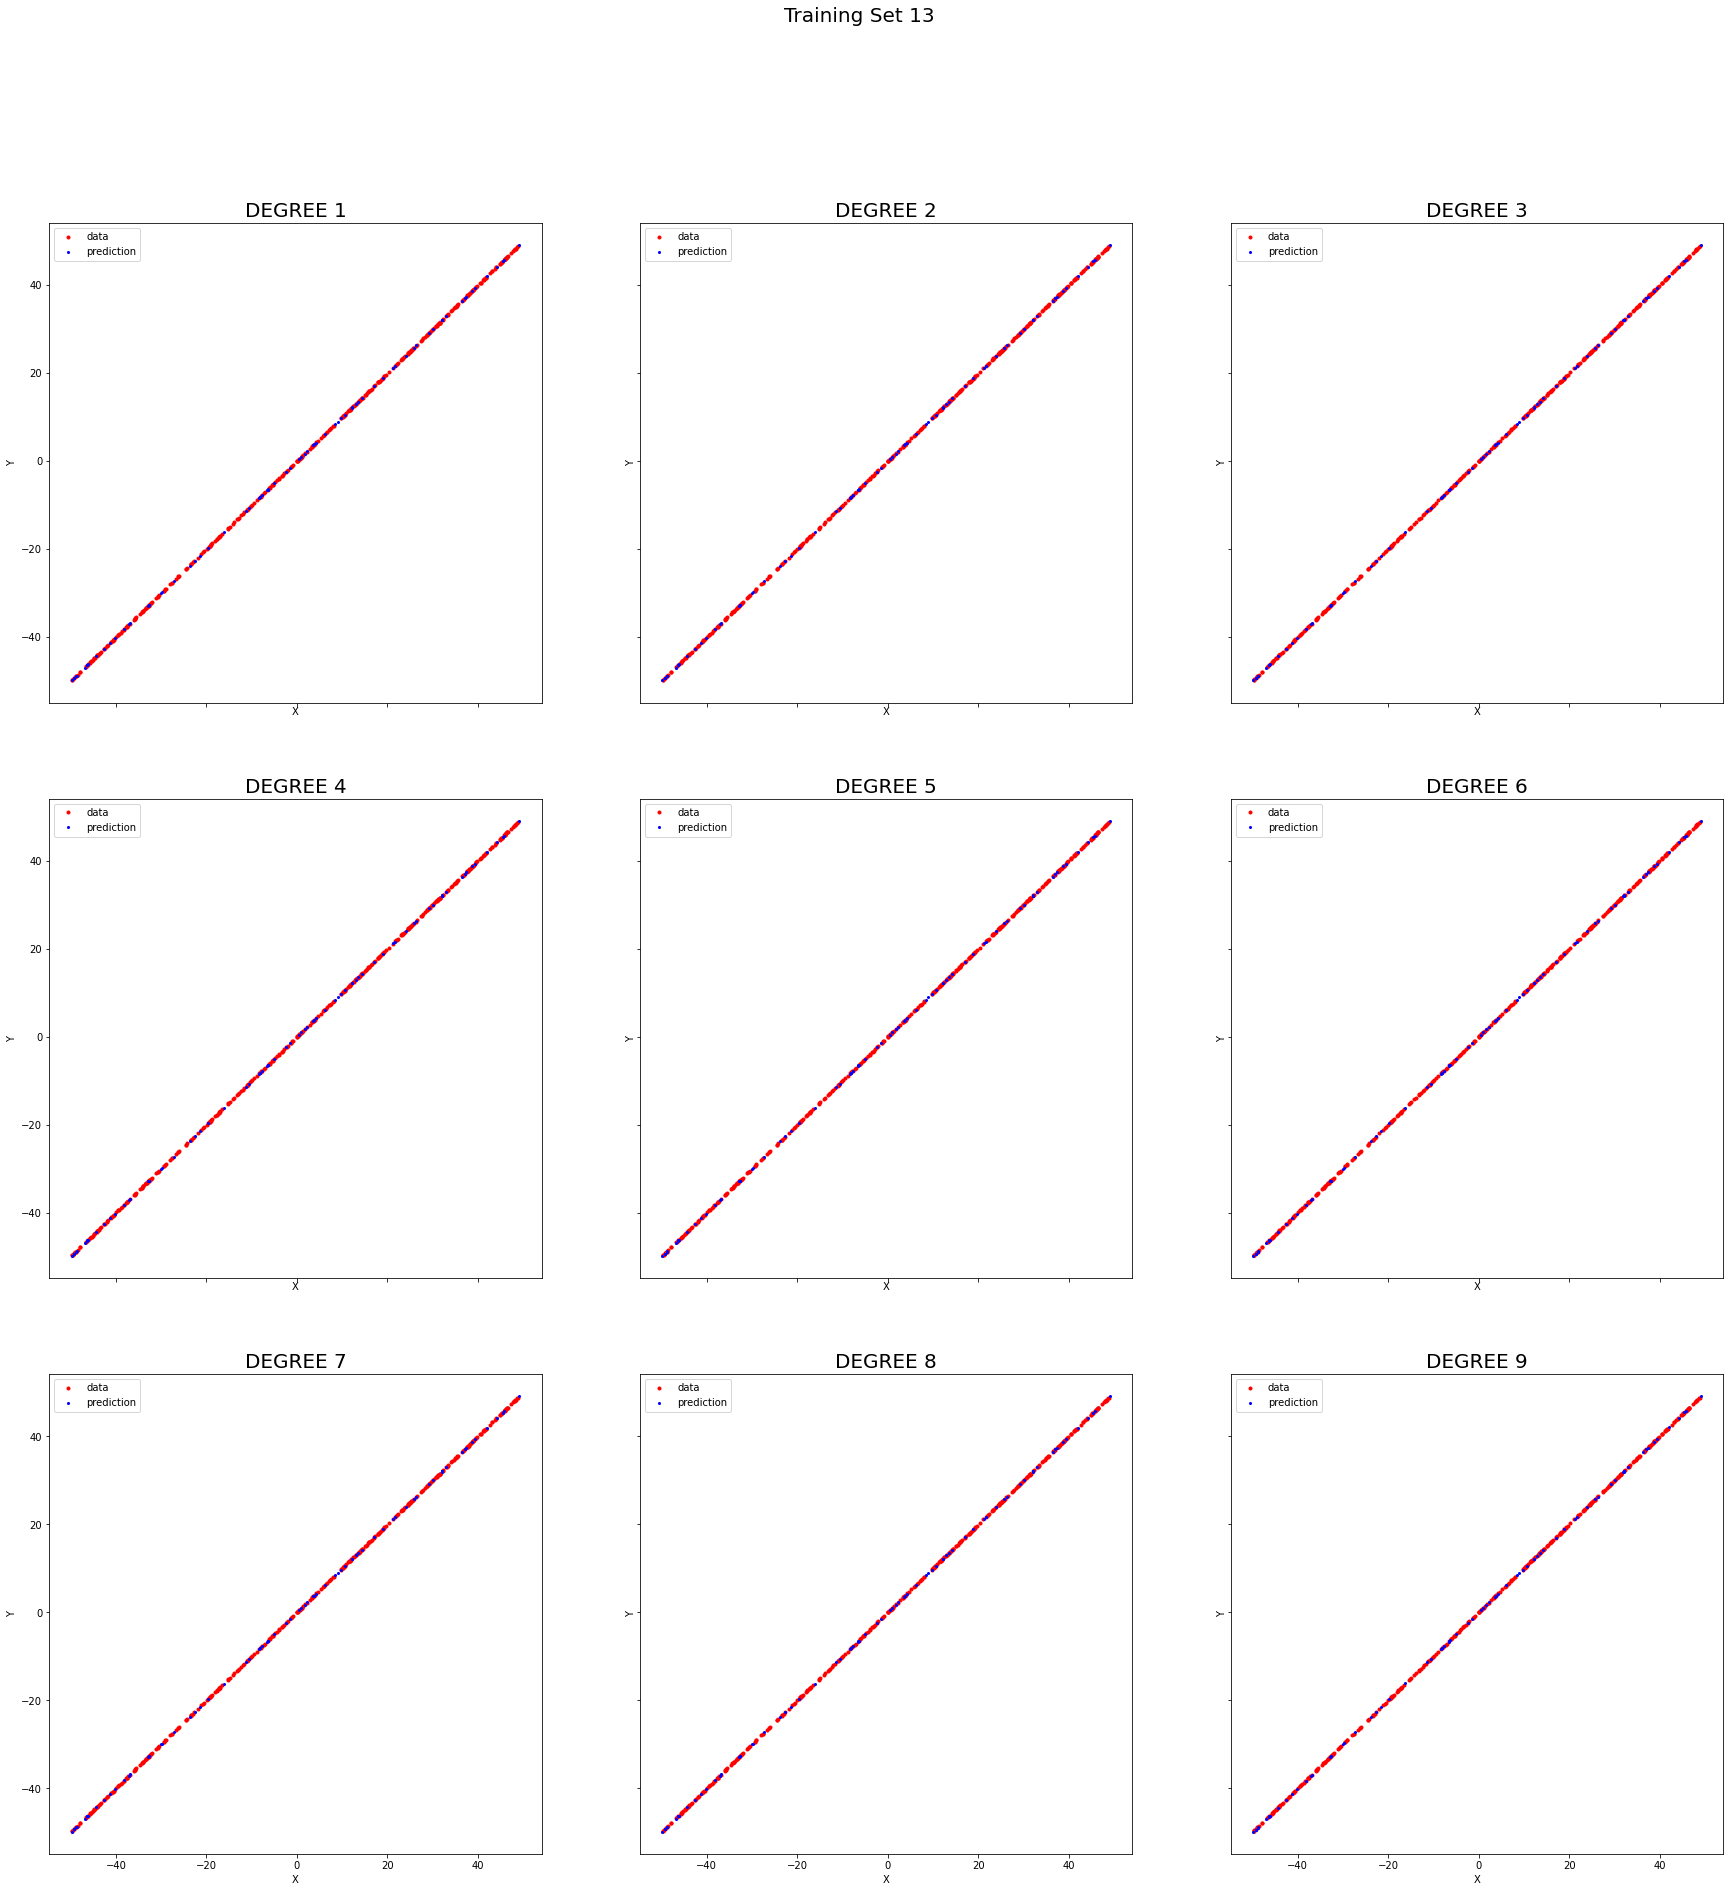

<Figure size 432x288 with 0 Axes>

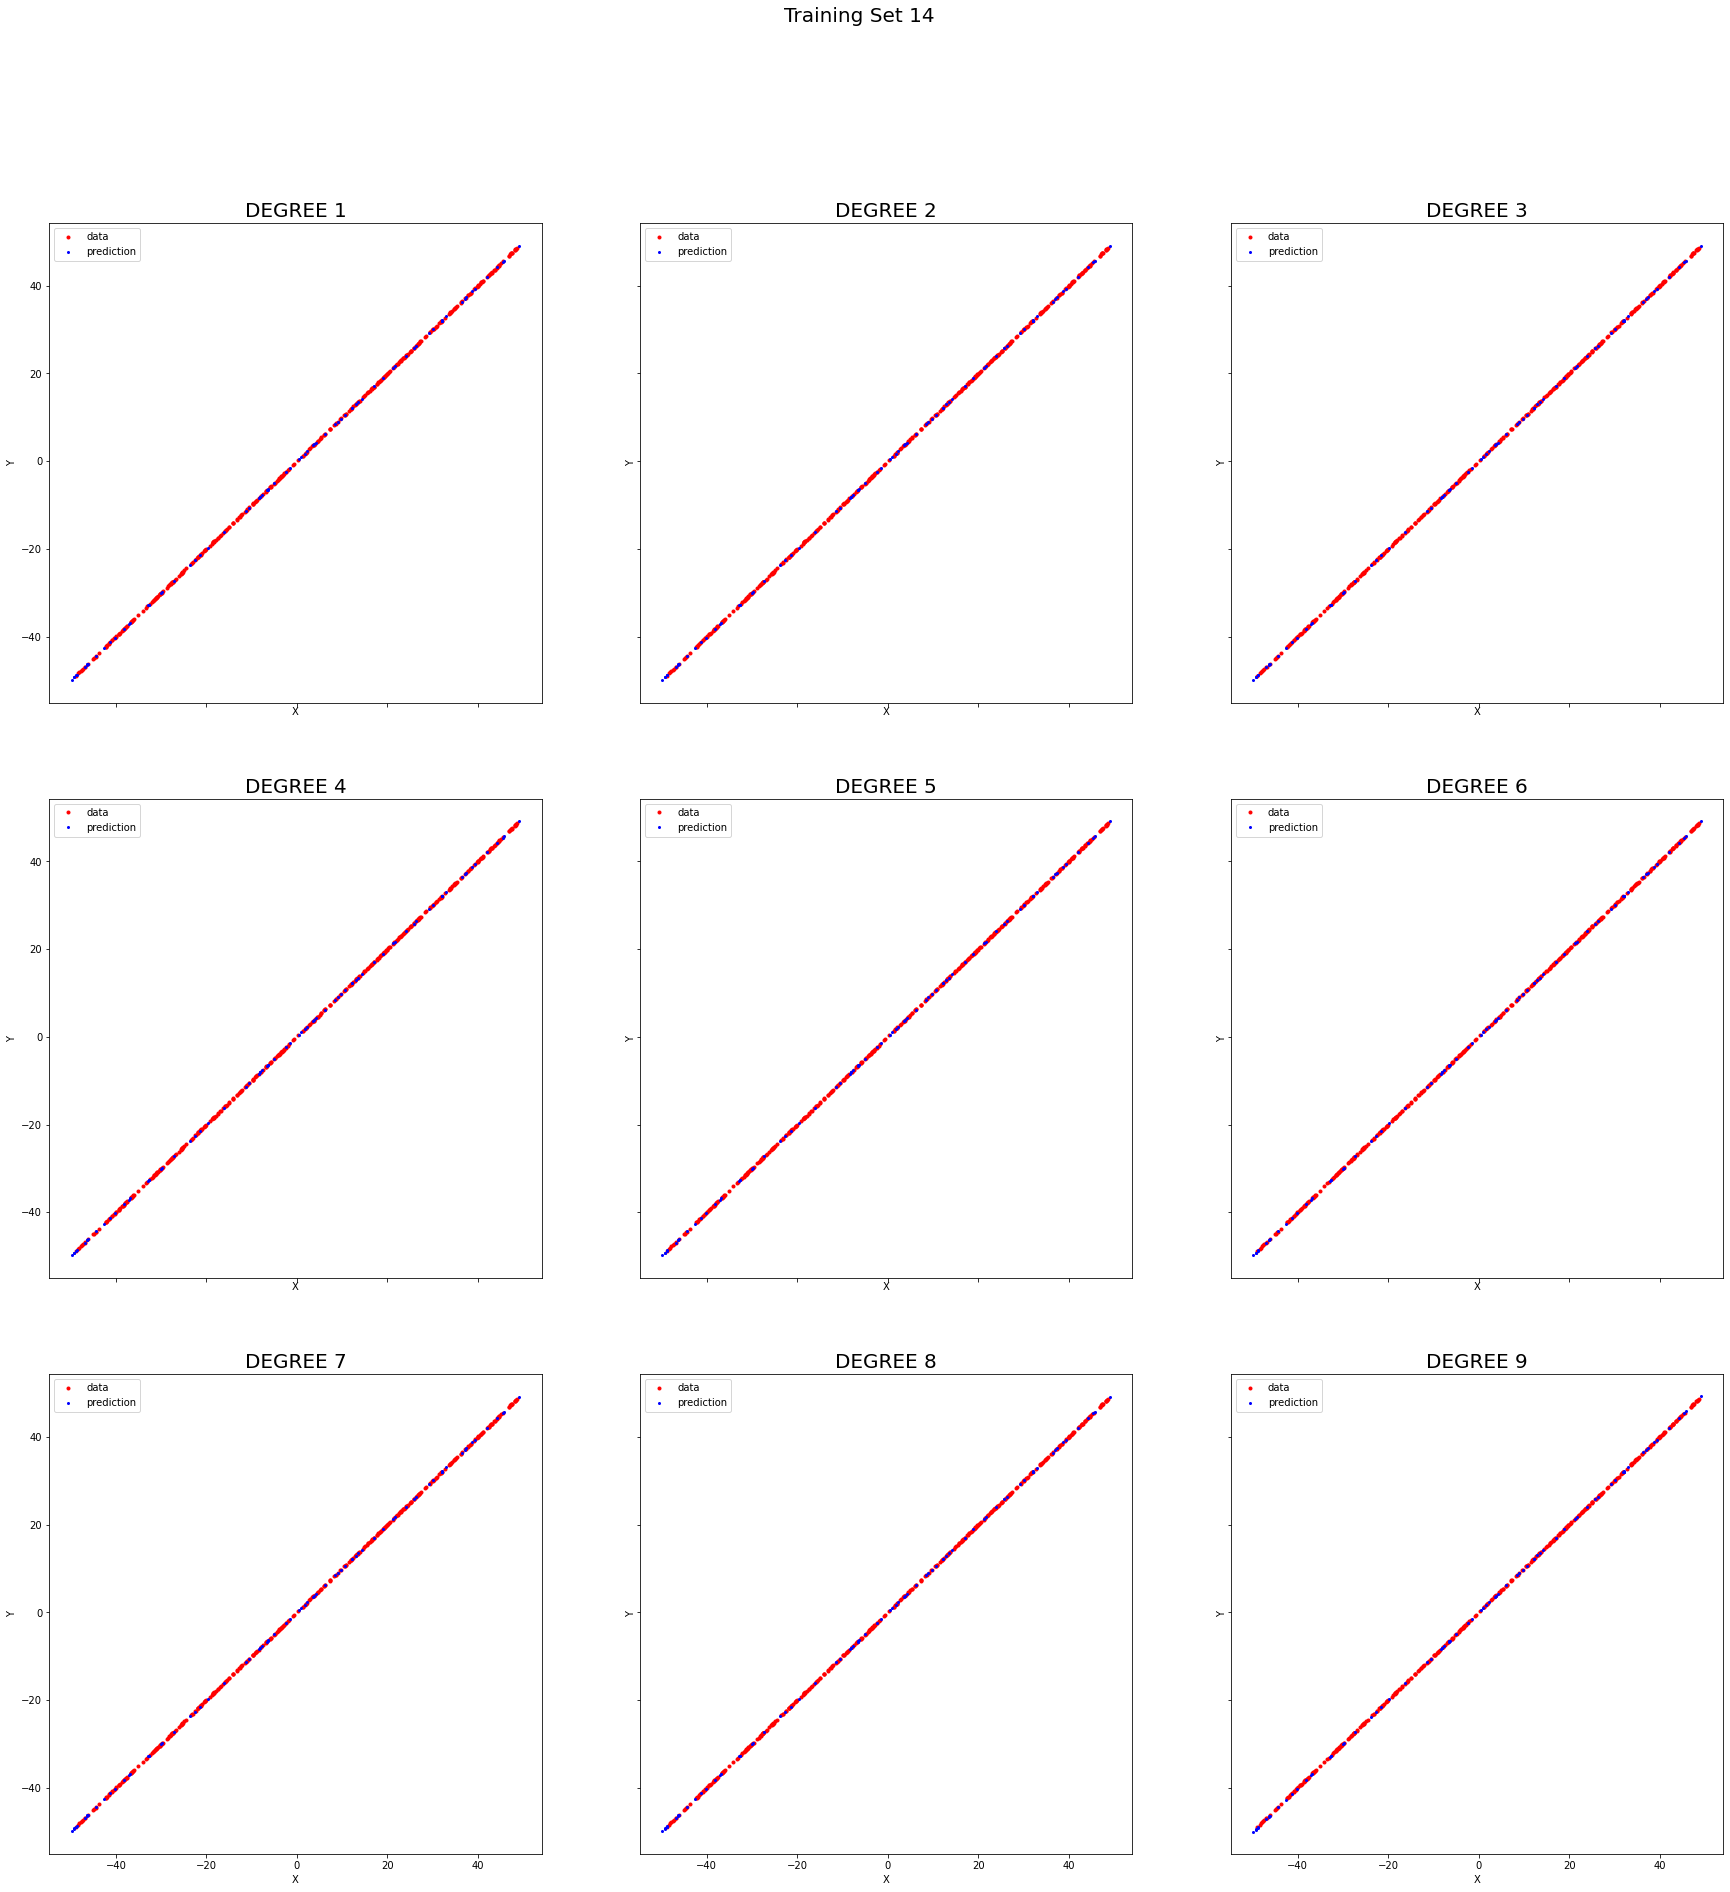

<Figure size 432x288 with 0 Axes>

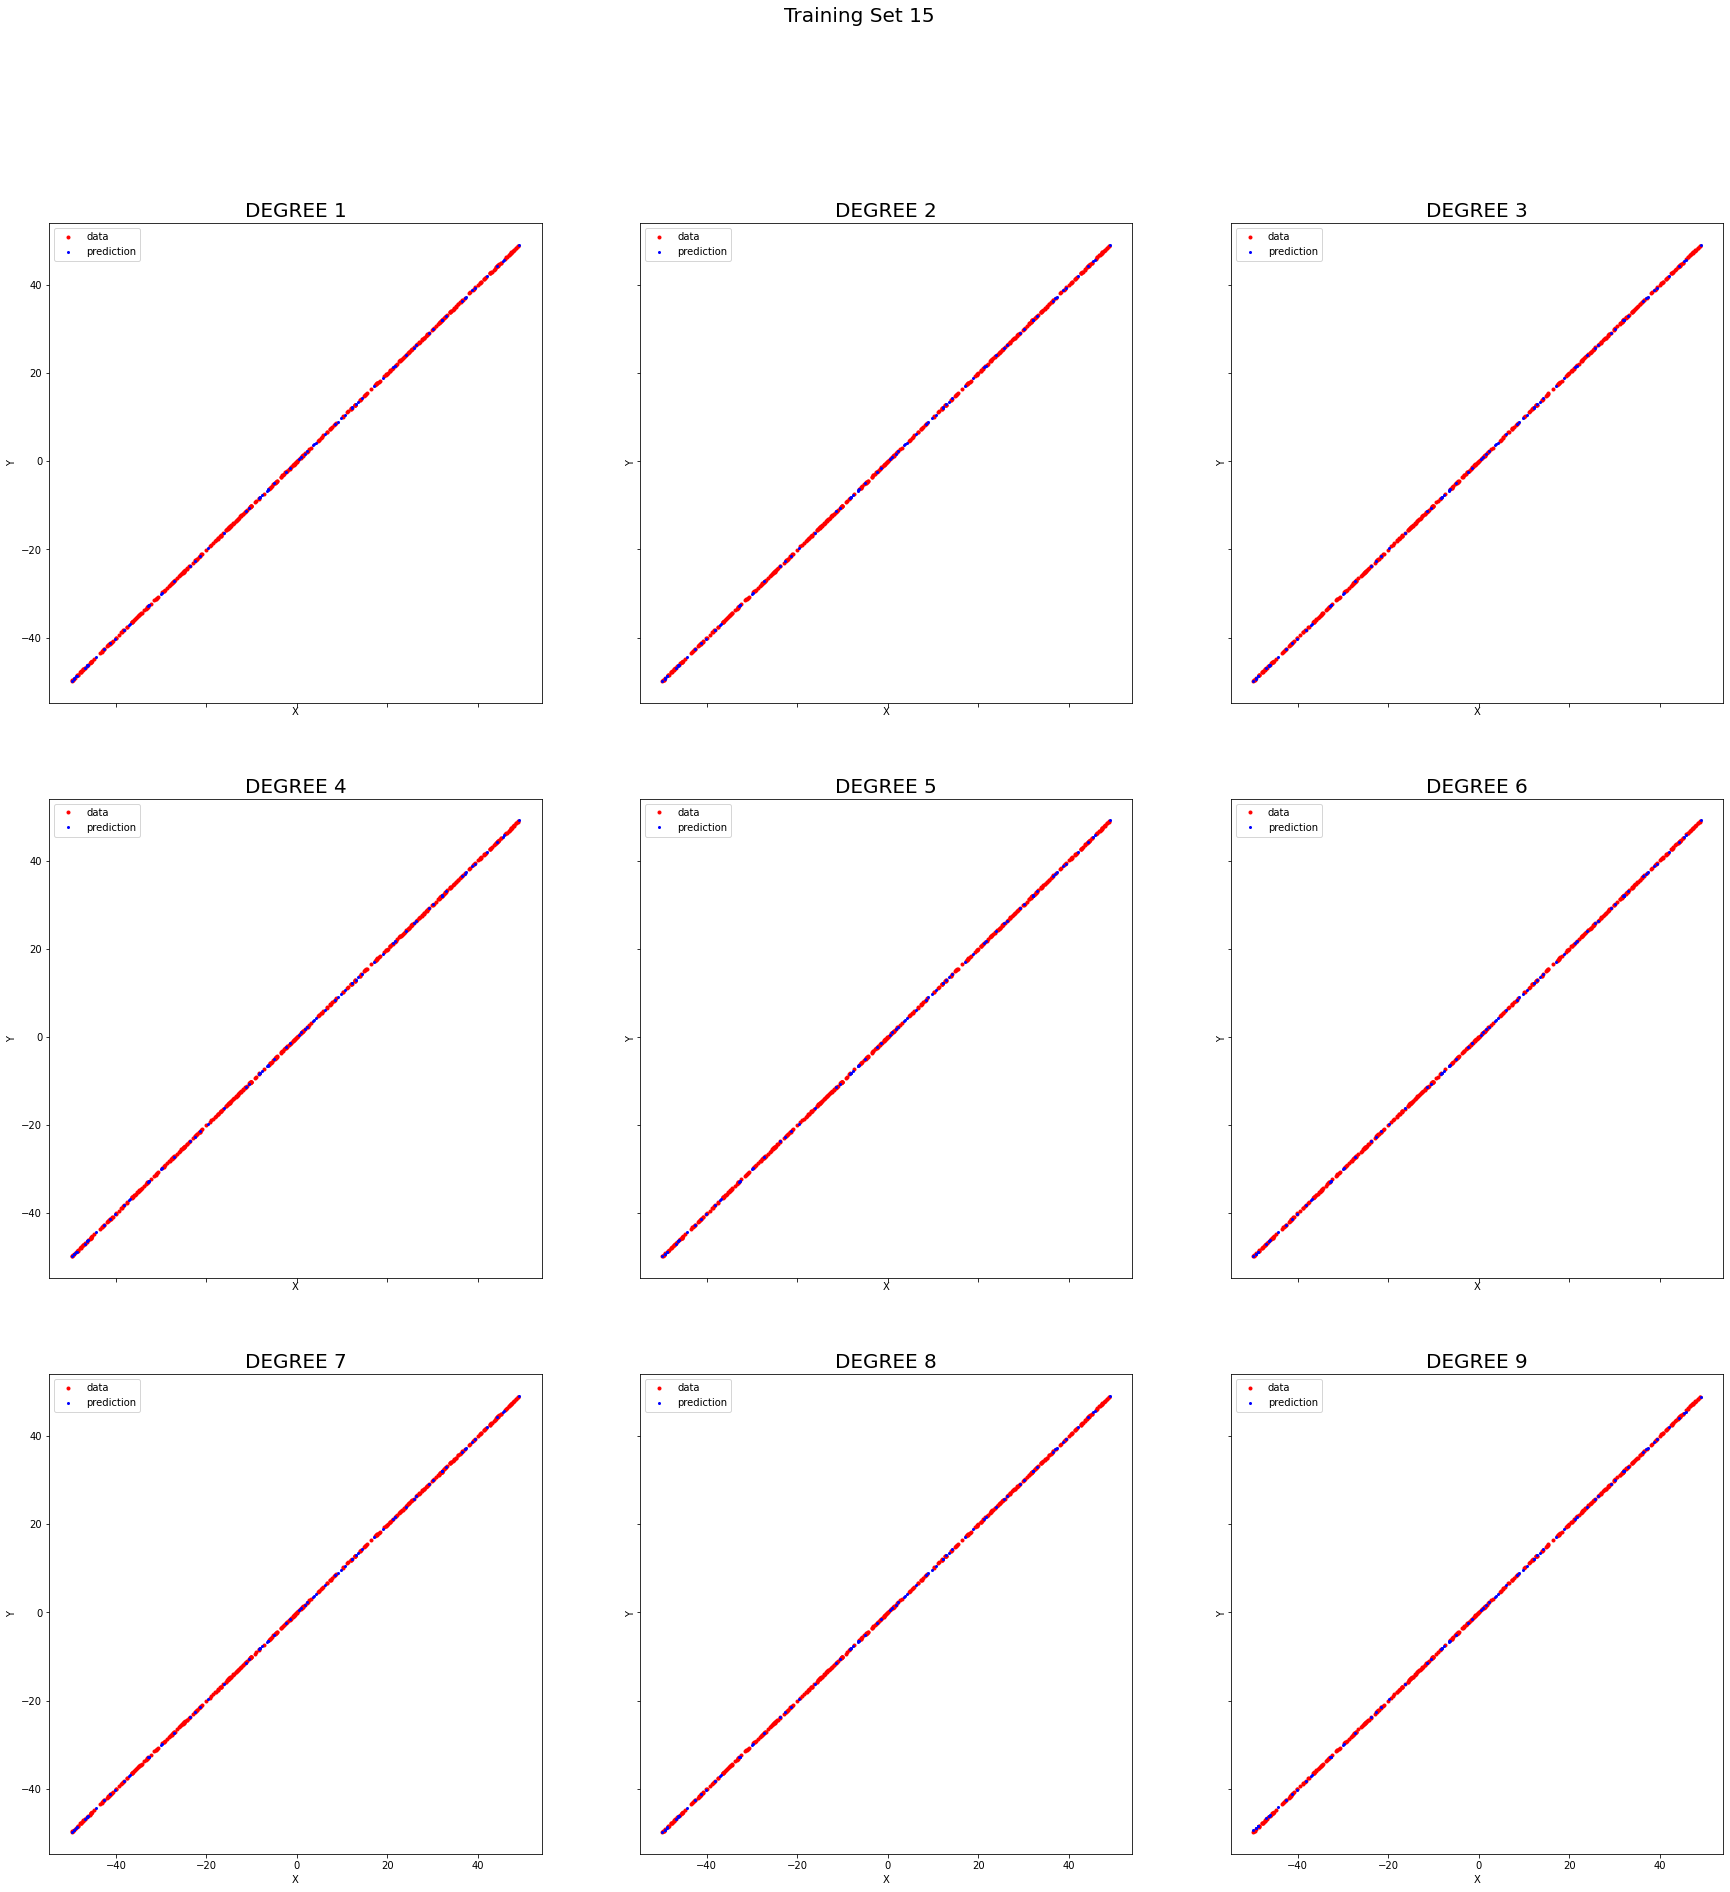

<Figure size 432x288 with 0 Axes>

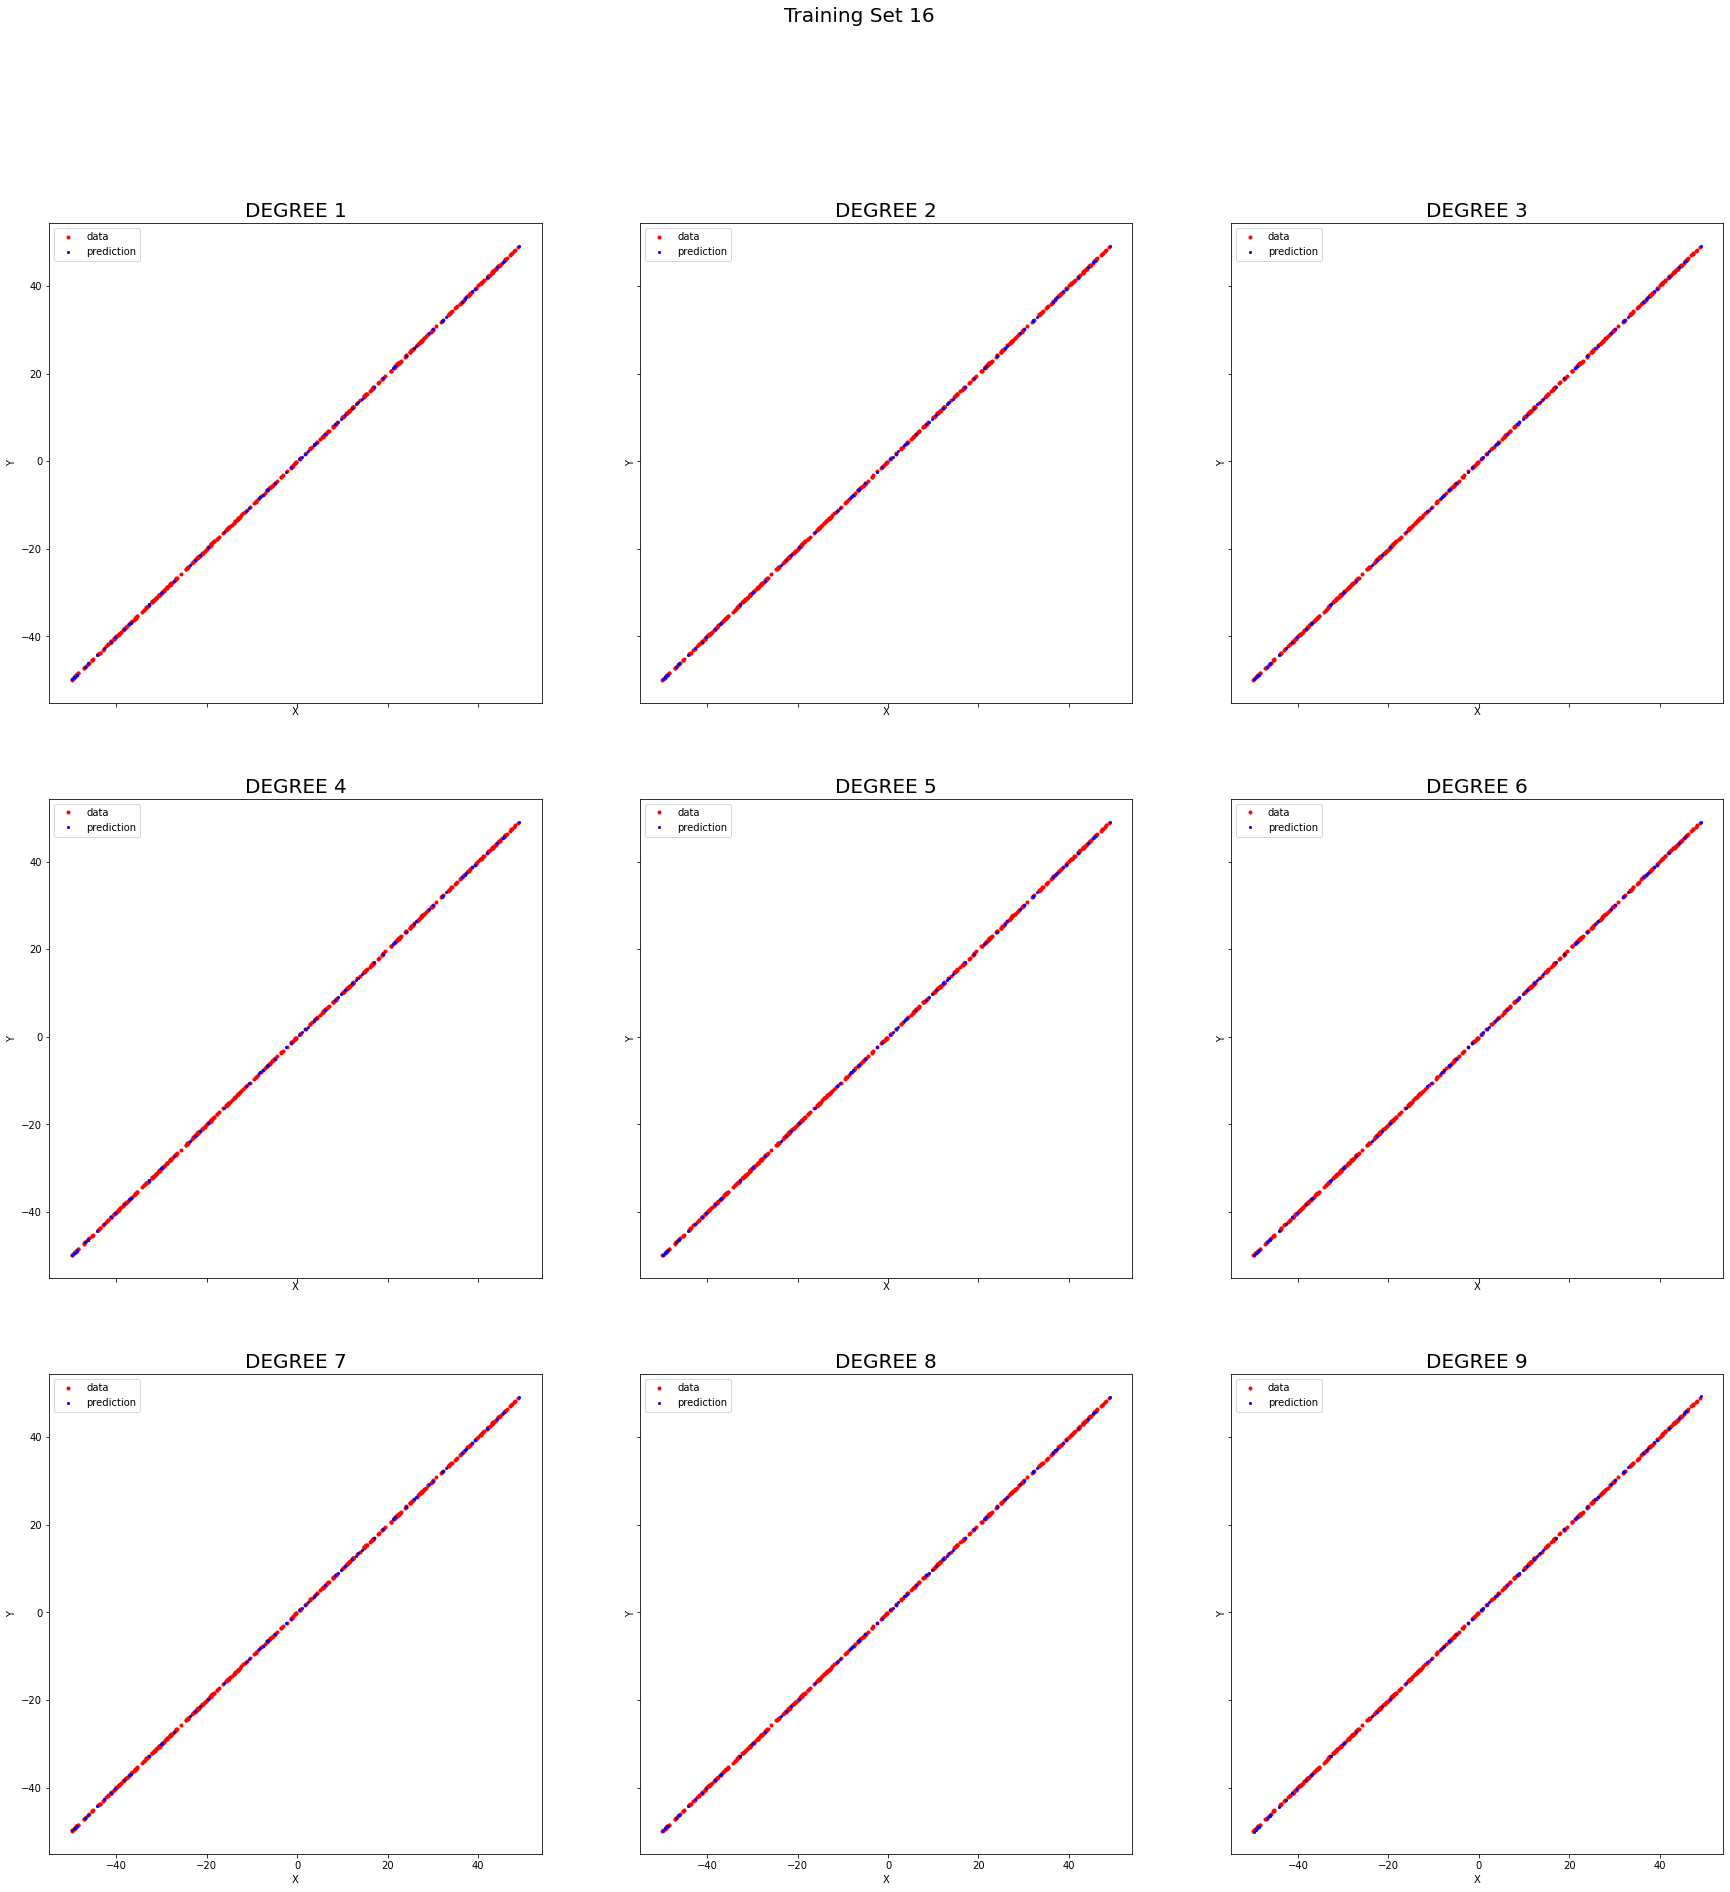

<Figure size 432x288 with 0 Axes>

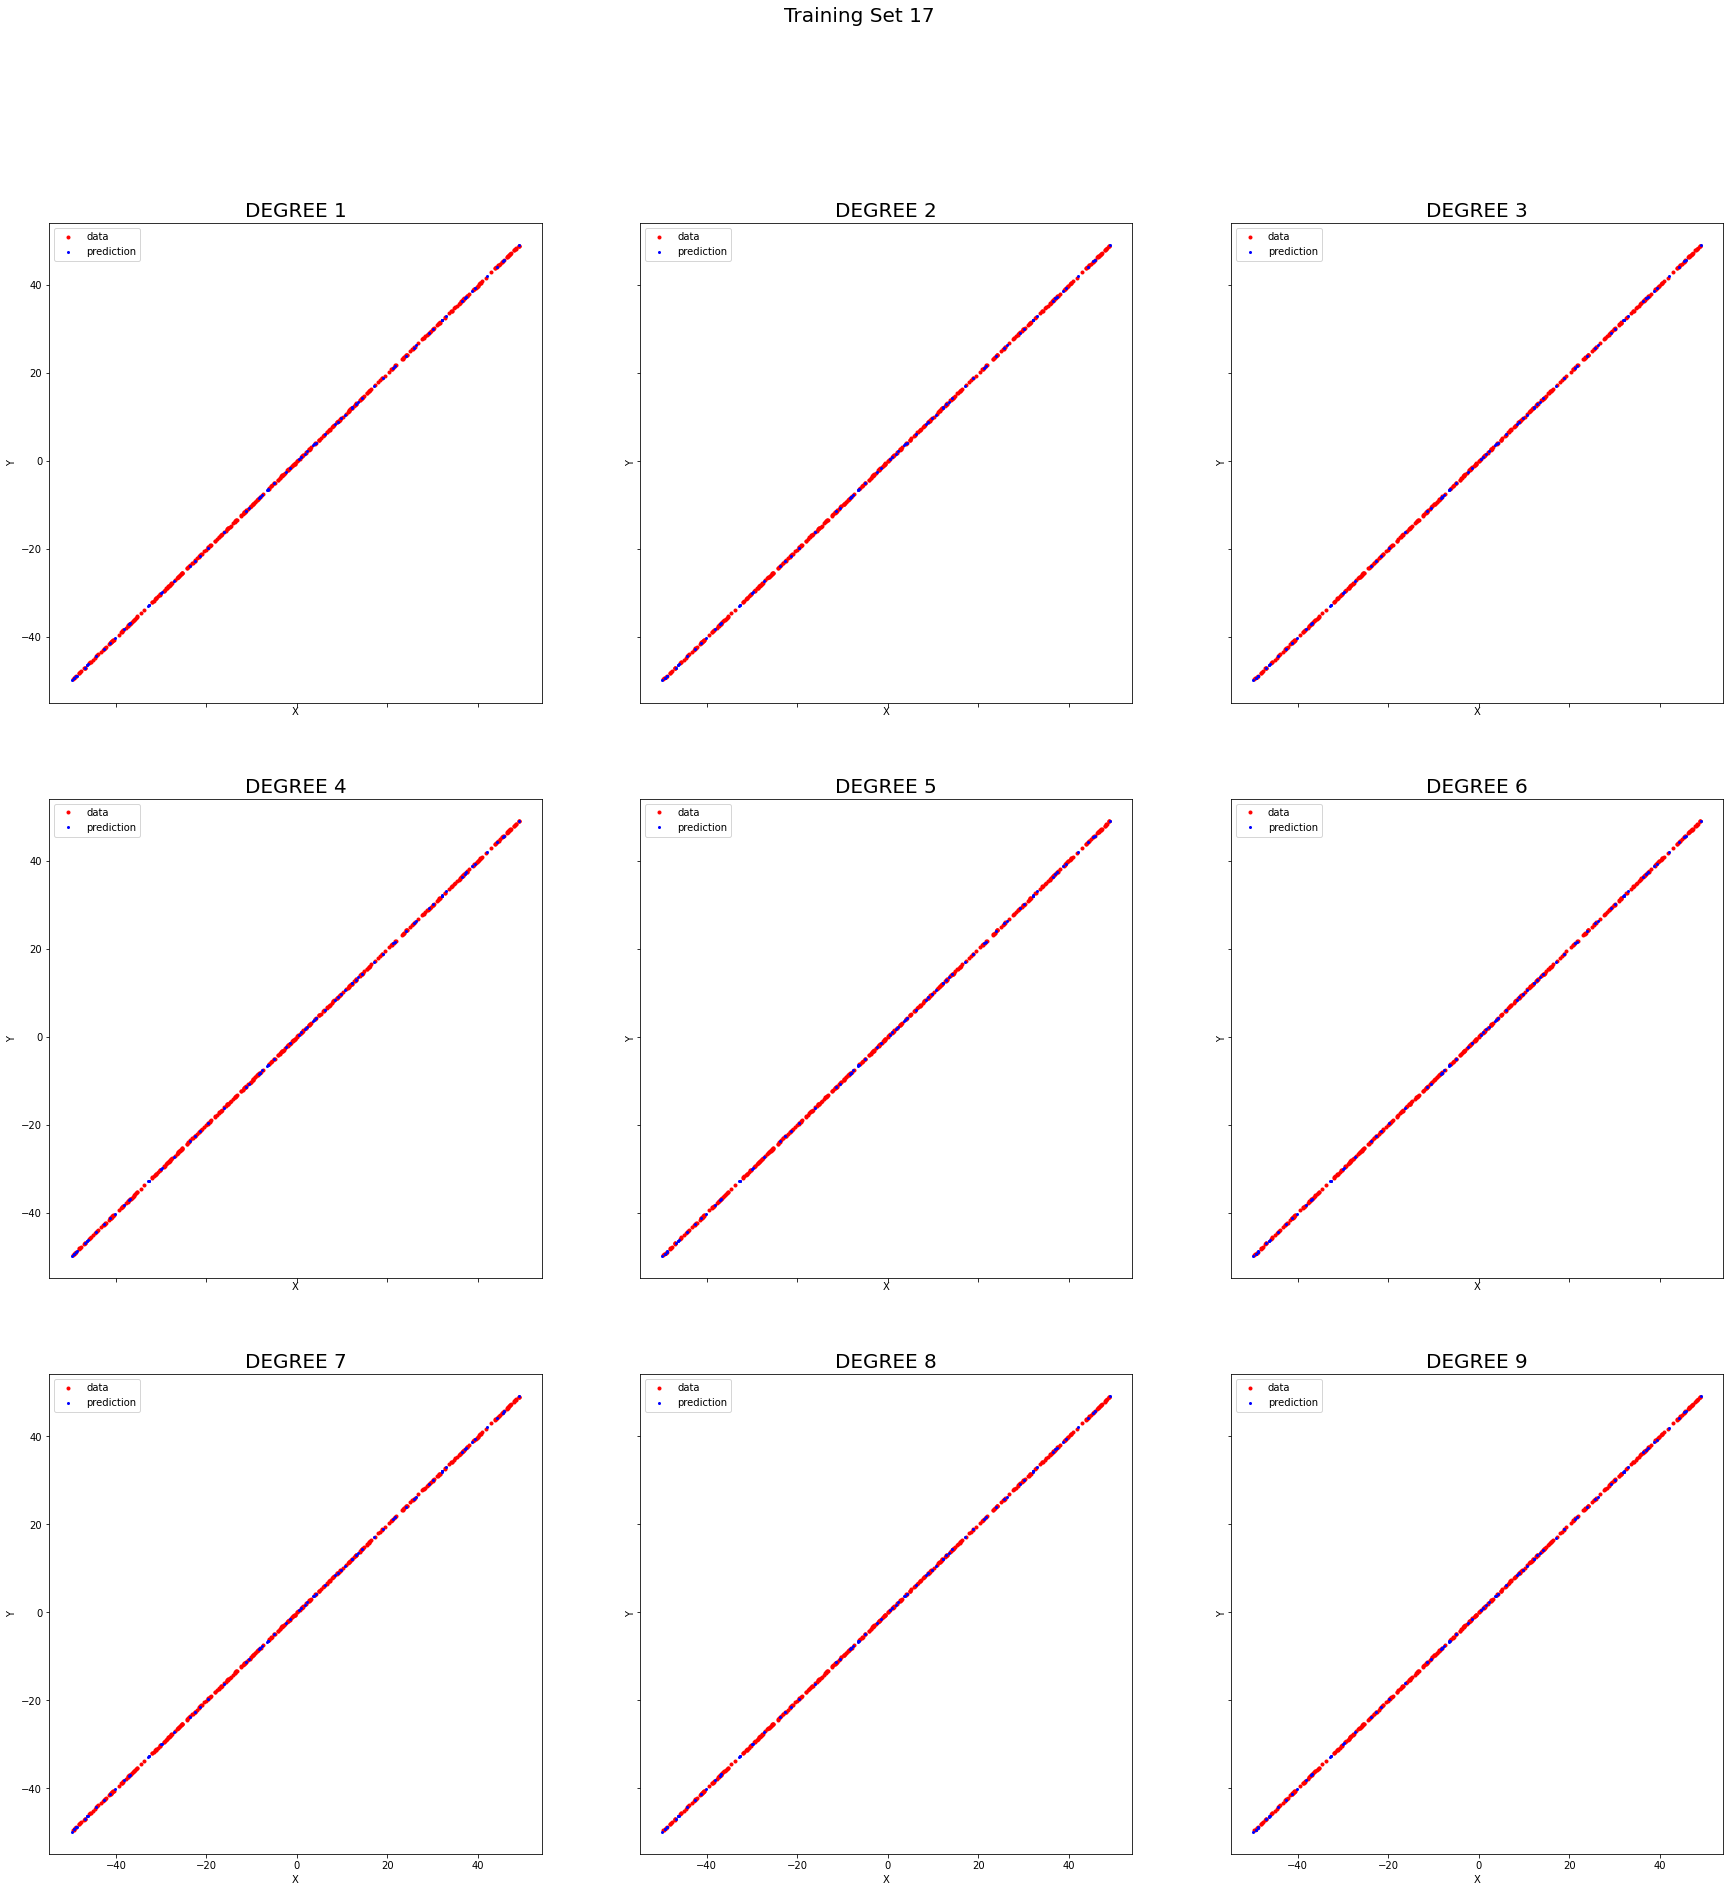

<Figure size 432x288 with 0 Axes>

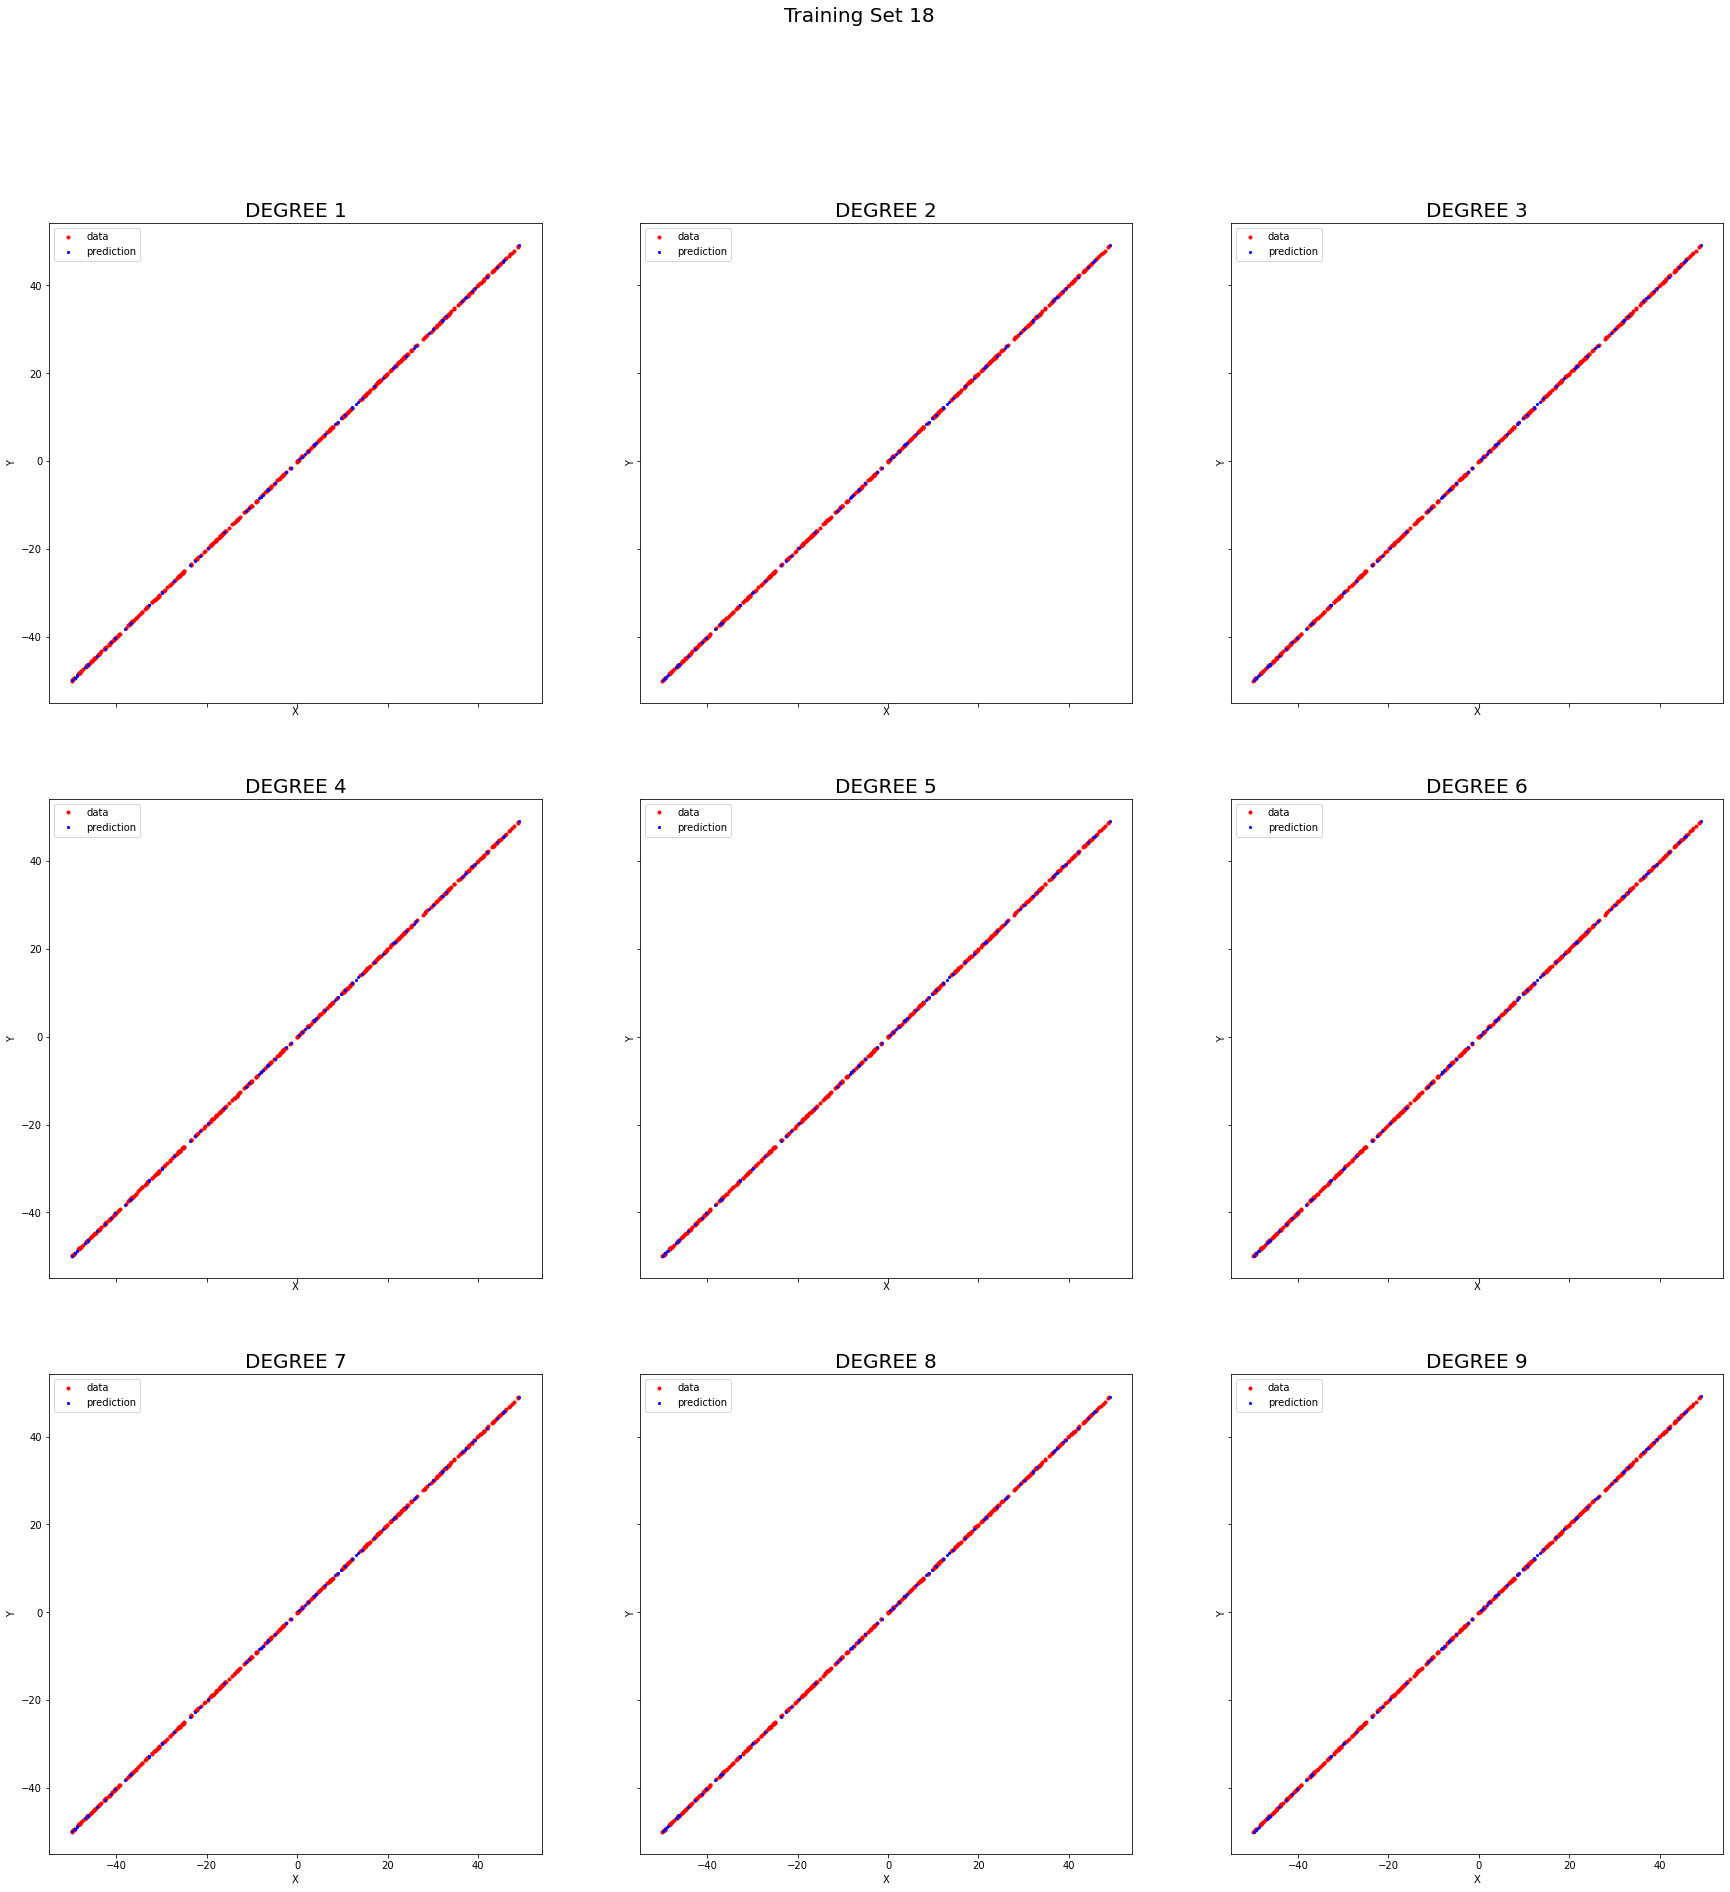

<Figure size 432x288 with 0 Axes>

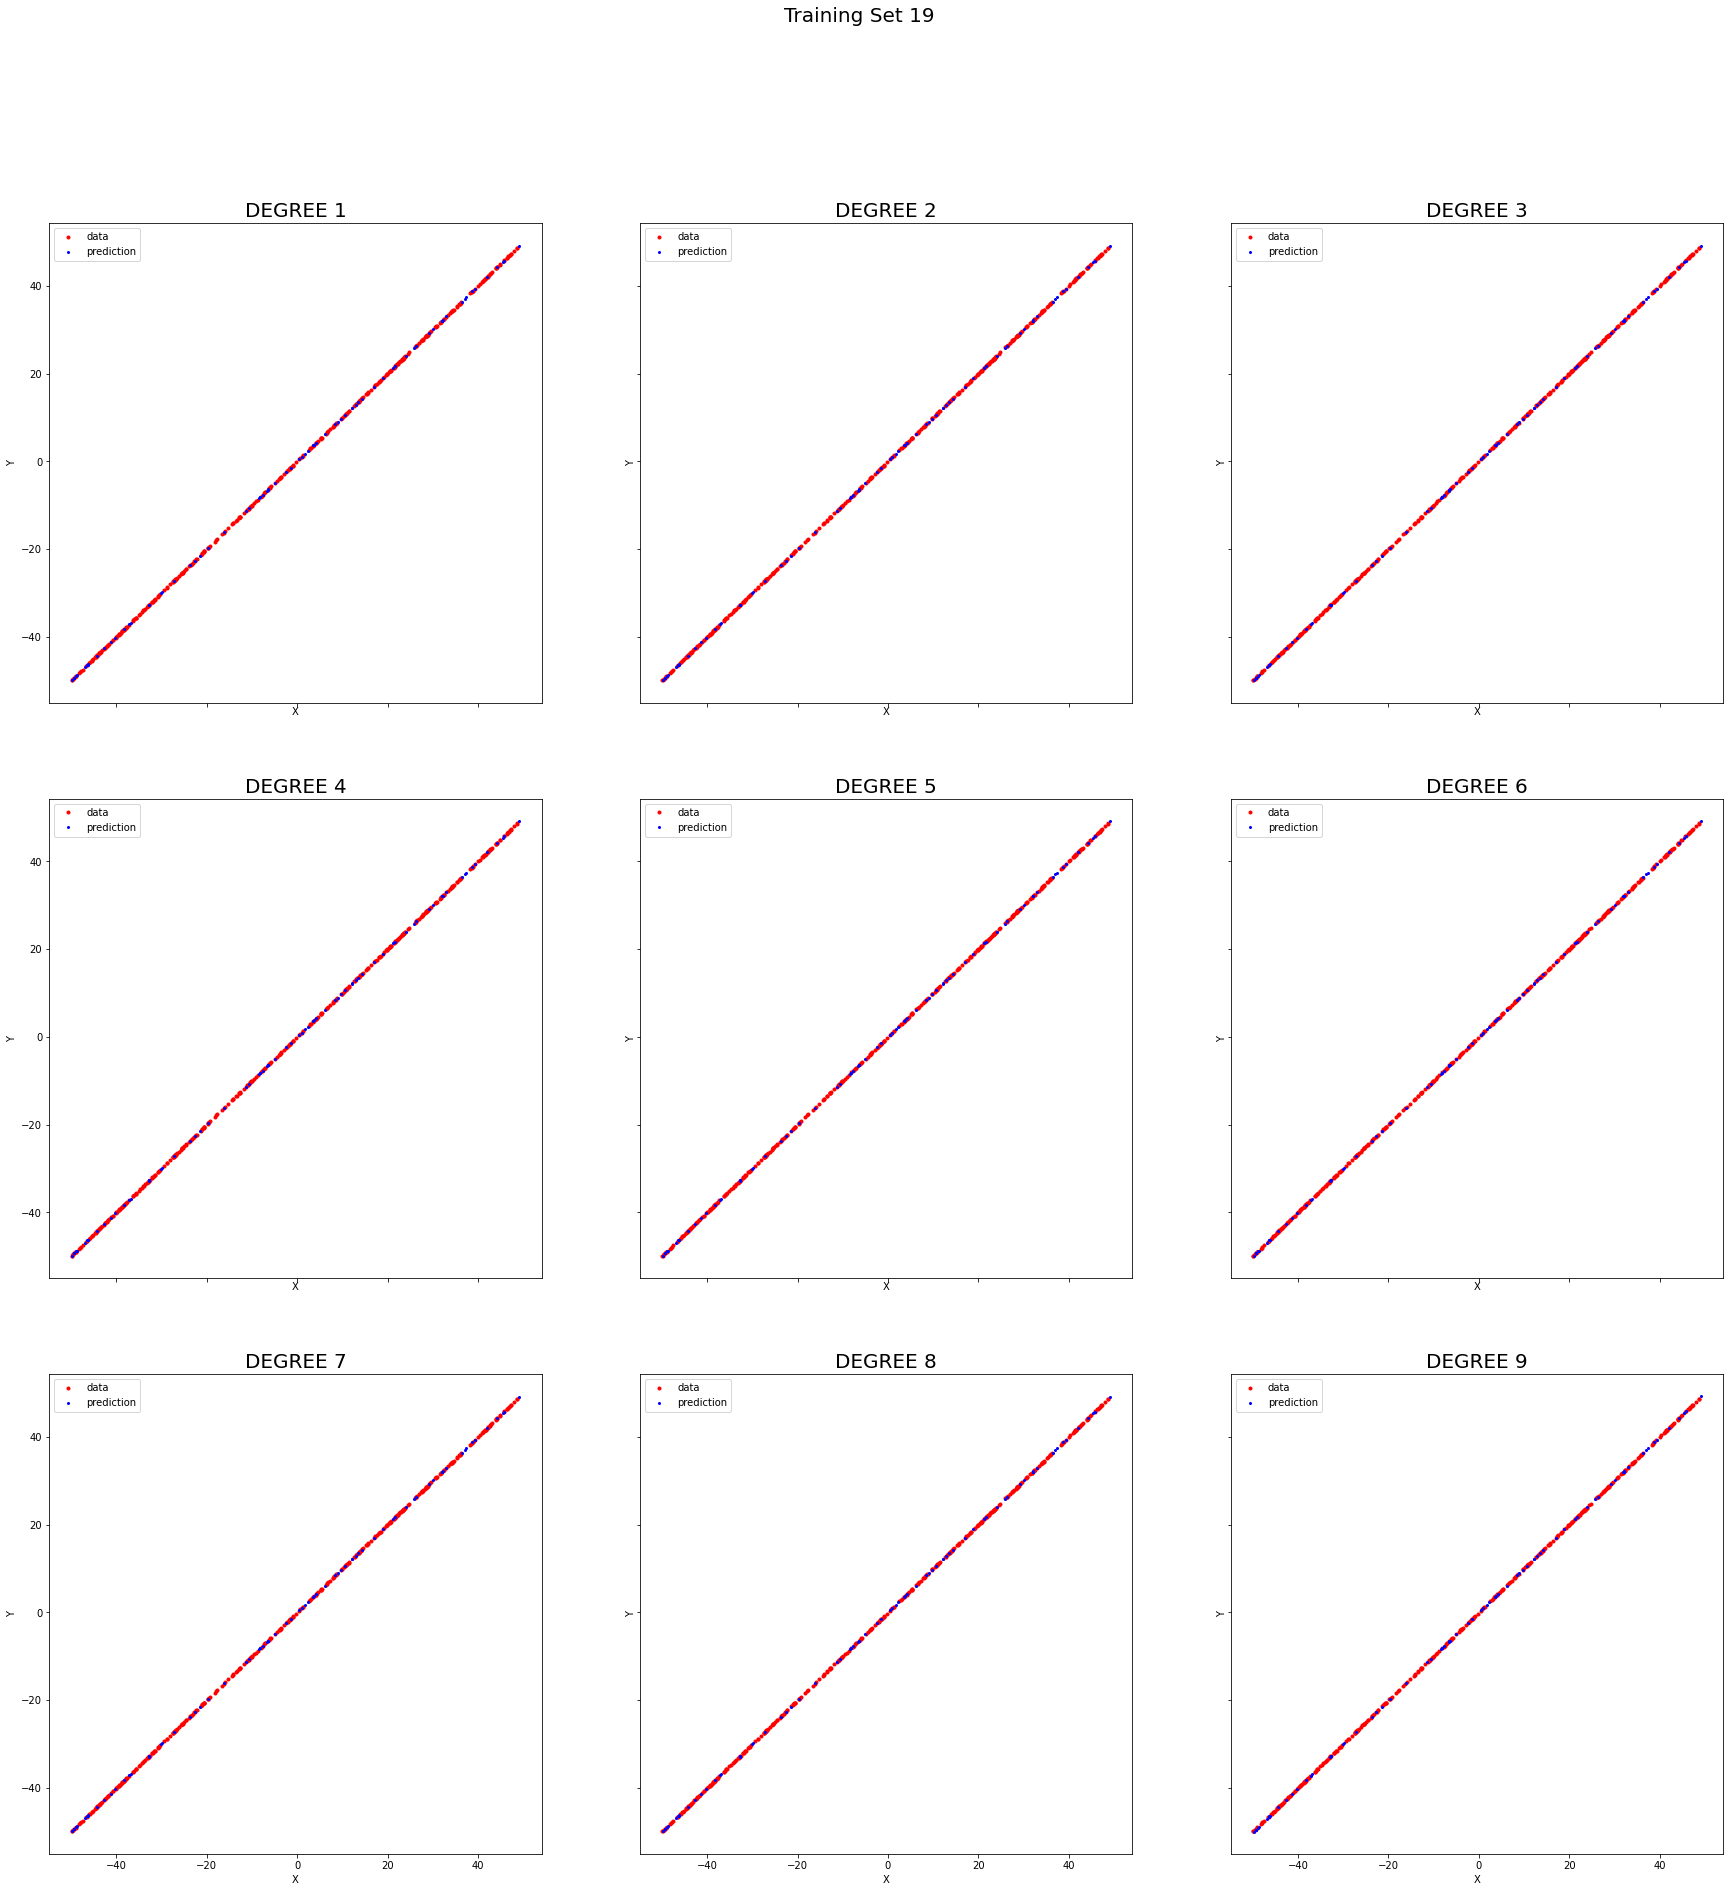

<Figure size 432x288 with 0 Axes>

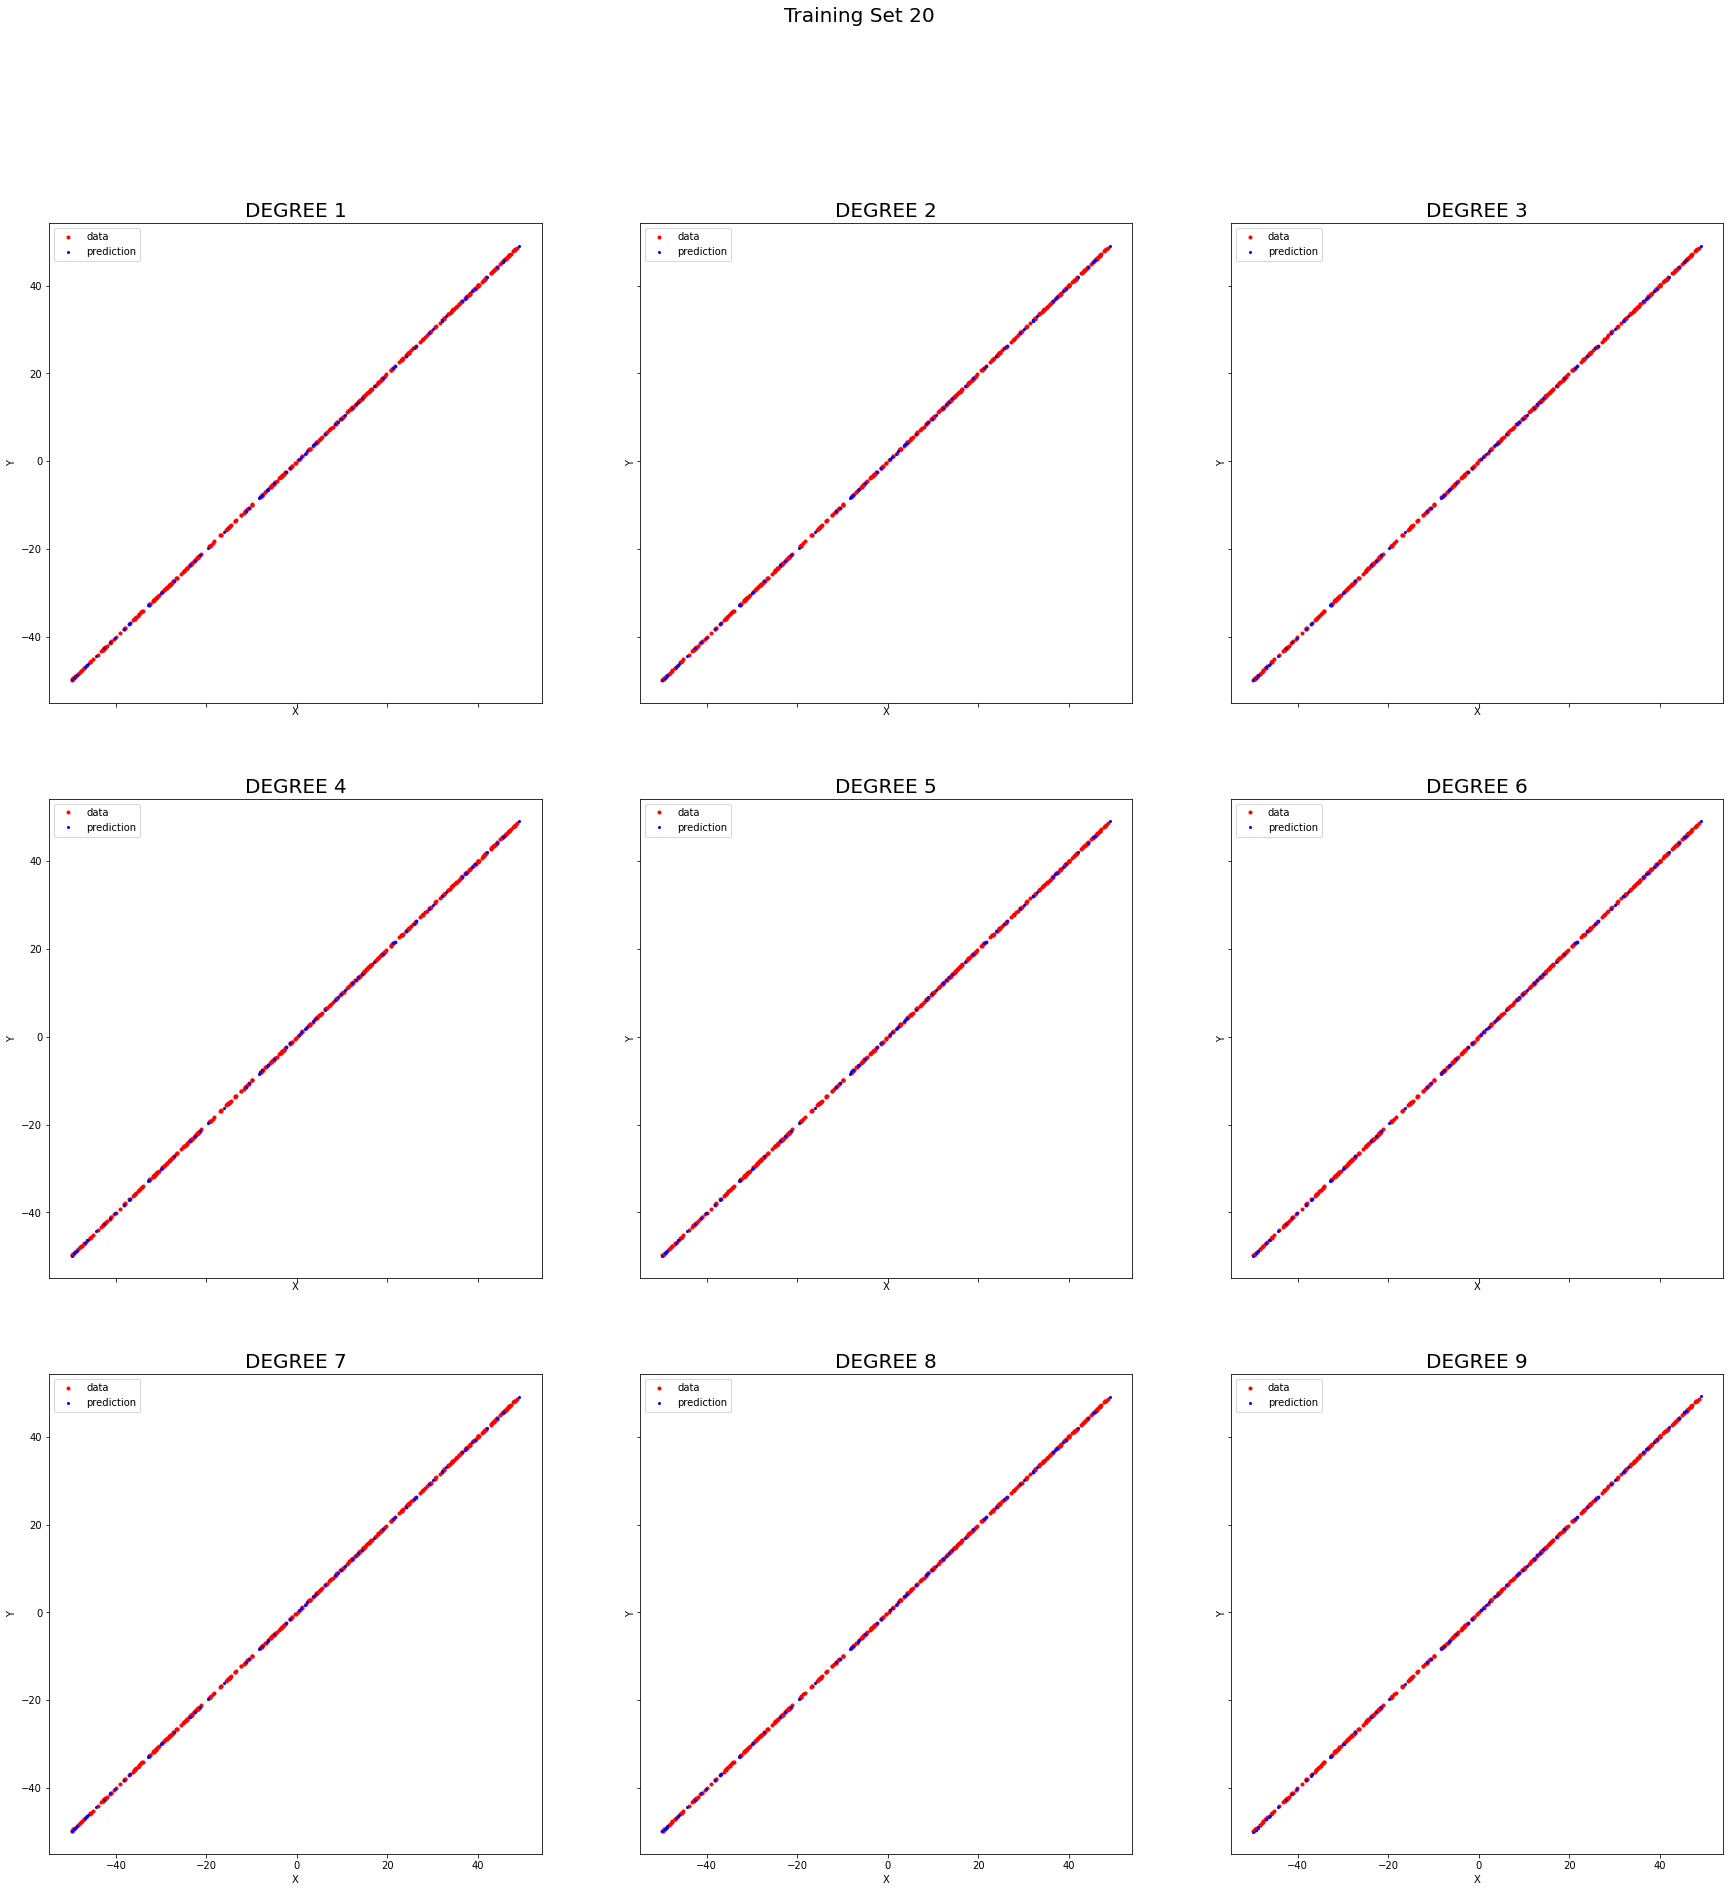

In [55]:
for i in range(20):
    # Preaparing the suplot grid system
    f = plt.figure();
    f, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey = True, figsize = (30, 30));

    
    x = X_train_data_sets[i][:, np.newaxis]
    y = X_train_data_sets[i]

    # Plotting the data
    for degree in range(9):
        axes[int(degree / 3)][int(degree % 3)].plot(x, y, "r.", label = "data");

        # Fitting the model into the (i + 1)th order
        poly = PolynomialFeatures(degree= degree + 1)
        features = poly.fit_transform(x)

        
        Lmodel = LinearRegression()
        Lmodel.fit(features, y)

        y_test_predict = Lmodel.predict(poly.fit_transform(xTest[:, np.newaxis]))
        
        # Plotting the Prediction
        axes[int(degree/3)][int(degree % 3)].plot(xTest[:,np.newaxis], y_test_predict, 'b.', markersize=4, label = "prediction");
        axes[int(degree/3)][int(degree % 3)].set_title("DEGREE "+ str(degree+1), fontdict = {"fontsize" : 20});
        axes[int(degree/3)][int(degree % 3)].set_xlabel("X");
        axes[int(degree/3)][int(degree % 3)].set_ylabel("Y");
        axes[int(degree/3)][int(degree % 3)].legend();
        plt.suptitle(f"Training Set {i + 1}", fontsize = 20);
    plt.show()


    
    

### Getting all predicted values

In [88]:
y_predicted = []
for i in range(20):
    x = X_train_data_sets[i][:, np.newaxis]  # transposing it
    y = Y_train_data_sets[i]
    temp = []
    for degree in range(0, 9):

        poly = PolynomialFeatures(degree= degree + 1)
        Xtrain_poly = poly.fit_transform(x)

        Lmodel = LinearRegression()
        Lmodel.fit(Xtrain_poly, y)
        
        y_test_predict = Lmodel.predict(poly.fit_transform(xTest[:, np.newaxis]))
        
        temp.append(y_test_predict)
    y_predicted.append(temp)

In [99]:
print(len(y_predicted))
print(len(y_predicted[0]))
print(len(y_predicted[0][0]))

20
9
80


### Bias and Variance

In [89]:
def find_bias_variance(order):
    y_predicted_part = []
    for i in range(20):
        # ith order for all models
        y_predicted_part.append(y_predicted[i][order])
        
    y_predicted_part = np.asarray(y_predicted_part)
    #TODO: Find the bias and the variance
    bias = np.mean(np.abs(y_predicted_part - yTest), axis = 0)
    variance = np.var(y_predicted_part, axis = 0)

    
    return(np.mean(bias), np.mean(variance))

In [90]:
bias = []
variance = []
for i in range(9):
    b, v = find_bias_variance(i)
    bias.append(b)
    variance.append(v)
print("Bias:", bias)
print("Variance:", variance)

Bias: [838.4178012324819, 841.9833750767832, 302.0238778887161, 355.33643478291197, 398.46669228841563, 432.47829148521777, 454.807972941535, 478.42886164920856, 495.9304534269875]
Variance: [70545.48914575037, 125870.85554877343, 150073.7395464843, 212235.7083257072, 276388.4802646255, 316863.5005527388, 357511.1856504168, 404290.4257645, 457095.6196322652]


In [91]:
# The lists, bias and variance, now contain the bias and variance corresponding to a particular degree.

# Tabulate the values

# We use the pandas library in order to display the required items in a table format
final_table = dict()
final_table["DEGREE"] = range(1, 10)

final_table["BIAS"] = bias
final_table["BIAS^2"] = list(np.array(bias)**2)

final_table["VARIANCE"] = variance
final_table["MSE"] = list(np.array(final_table["BIAS^2"])+np.array(variance))
df = pandas.DataFrame(final_table)
print(df)


   DEGREE        BIAS         BIAS^2       VARIANCE            MSE
0       1  838.417801  702944.409424   70545.489146  773489.898569
1       2  841.983375  708936.003906  125870.855549  834806.859454
2       3  302.023878   91218.422815  150073.739546  241292.162361
3       4  355.336435  126263.981884  212235.708326  338499.690210
4       5  398.466692  158775.704863  276388.480265  435164.185128
5       6  432.478291  187037.472606  316863.500553  503900.973159
6       7  454.807973  206850.292251  357511.185650  564361.477902
7       8  478.428862  228894.175659  404290.425764  633184.601423
8       9  495.930453  245947.014636  457095.619632  703042.634269


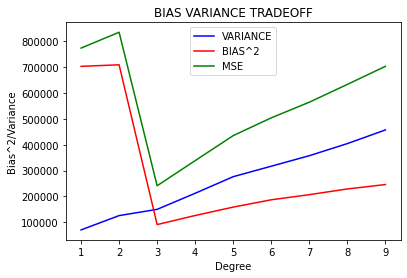

In [92]:
# Plot the bias-variance tradeoff
plt.plot(final_table["DEGREE"], final_table["VARIANCE"], color="blue")
plt.plot(final_table["DEGREE"], final_table["BIAS^2"], color="red")
plt.plot(final_table["DEGREE"], final_table["MSE"], color="green")
plt.title("BIAS VARIANCE TRADEOFF")
plt.xlabel("Degree")
plt.ylabel("Bias^2/Variance")
plt.legend(["VARIANCE", "BIAS^2", "MSE"])
plt.show()
